# Final Project: Lake Erie & Harmful Algal Blooms

## Sara C, Merjem Memic, Alicia S, Jessica Z
### EARTH/SPACE/CLIMATE 323
### April 19, 2024

# Purpose and Introduction
The purpose of this analysis is to better understand how nutrient levels in the western basin of Lake Erie have changed over time and whether high nutrient levels correlate with known Harmful Algal Bloom (HAB) events by plotting, cross-examining, and researching physical implications of our data. Furthermore, we want to know how agricultural runoff and wastewater discharge affect nutrient conentrations in Lake Erie and if one is more indicative of HABs events.

The Great Lakes–Superior, Michigan, Huron, Erie, and Ontario–are an interconnected series of lakes that make up the world’s largest system of fresh water <strong>[2]</strong>. Lake Erie is the southernmost of the Great Lakes and provides a variety of critical ecosystem services, such as drinking water. Western Lake Erie is its largest and shallowest basin, making it particularly sensitive to climate change.

One of the most serious threats to ecosystem viability in Lake Erie are HABs. A combination of the natural lake conditions, climate change, and high anthropogenic productivity make this freshwater system vulnerable to algal growth. In high quantities, these algae compromise drinking water sources, the fishing industry, and native aquatic organisms. Hypoxia caused by sinking algae matter has been estimated to cause $82 million in damages per year <strong>[5]</strong>.
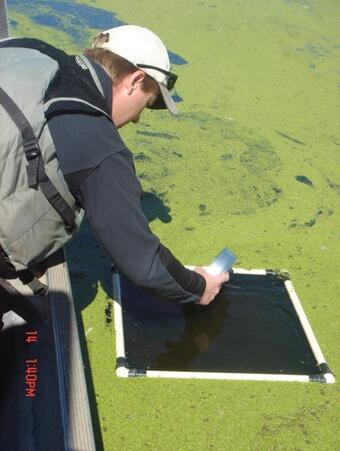

HABs are caused by cyanobacteria, commonly known as blue-green algae. These algae grow more widely in freshwaters with high nutrient content, mainly phosphorus and nitrogen, which is largely present in both sewage and fertilizer. Large algal blooms are primarily attributed to agricultural and wastewater discharges into waterways and is commonly referred to as eutrophication. Eutrophication is a concern in western Lake Erie, which is surrounded by 70% agricultural land as well as Detroit and other populous cities <strong>[4]</strong>.

One of the last attempts to decrease nutrient input into Lake Erie was The Great Lakes Water Quality Agreement of 1972, which required all municipal discharges with flows over 3800 cubic meters per day to limit phosphorus discharge <strong>[1]</strong>. This discharge limit decreased phosphorus levels and saw a dramatic 89% decrease in cyanobacteria in Lake Erie <strong>[7]</strong>. Despite these initial improvements, harmful algal blooms have become common in recent years with the most significant HABs events occurring in 2011, 2013, and 2015 <strong>[6]</strong>. Because of this trend, it is relevant to characterize the impacts between anthropogenic nutrient discharges and large algal blooms to help mitigate potential HABs events in the future.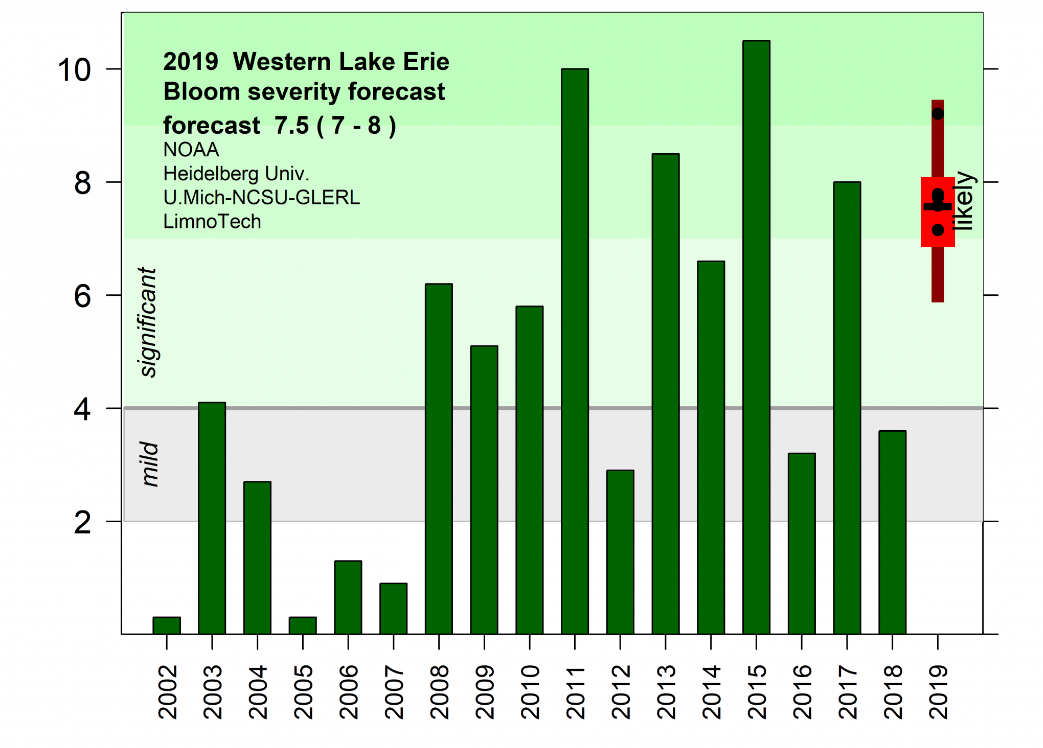

Human nutrient pollution into the Great Lakes can be catergorized into 2 major sources: agricultural runoff and industrial/municipal plant discharges. Agricultural runoff encompasses fertilizer application by farmers and landowners -  as water runs through the soil due to precipitation events and snow melt, these nutrients are carried through the watershed basin and deposited into the lake. Industrial/municipal plant discharges include domestic wastewater, as well as various industrial waste streams.

Lake Erie is located south of Ontario, Canada and north and west of Ohio and Michigan, respectively. The western basin of Lake Erie is surrounded by mostly agricultural land and highly densely populated cities such as Windsor, Detroit, Toledo, and Cleveland <strong>[1][4]</strong>.
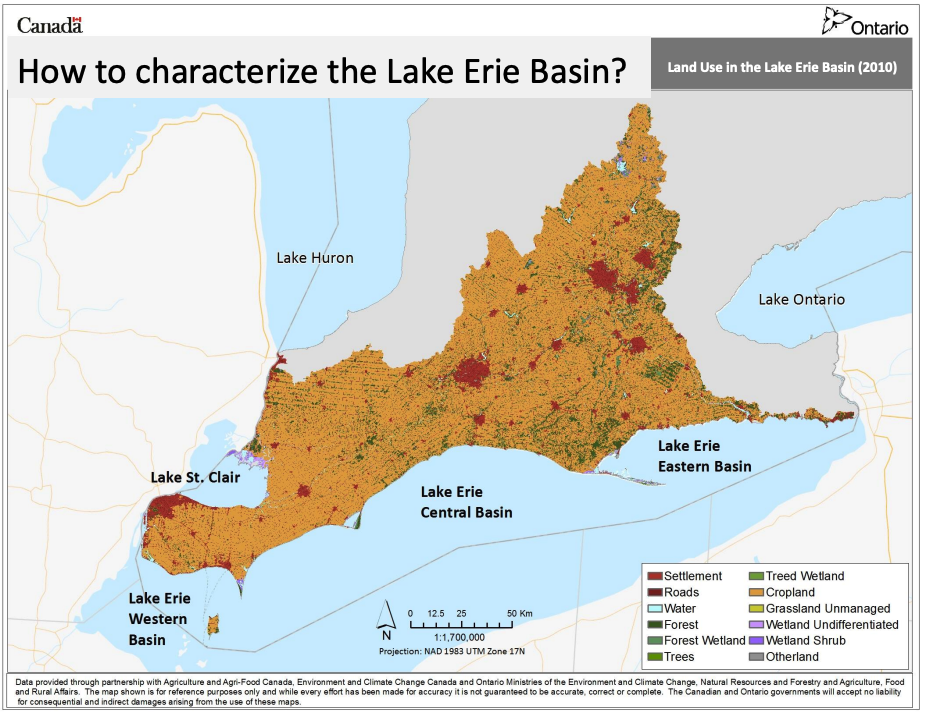

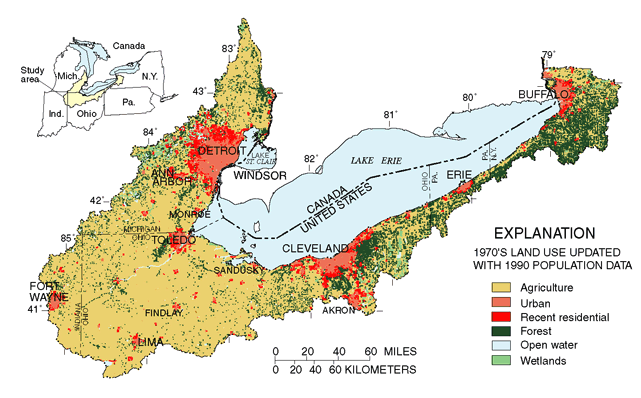

# Primary Research Questions

### 1. What are the primary trends and variations in Lake Erie nutrient levels between 2012 to 2018? Observe and characterize the behavior in nutrient concentrations over time, taking note of seasonal variations, relationships between variables, and HABs events.

### 2. What is the correlation between upstream nutrient release (agricultural runoff & wastewater discharge) and downstream nutrient concentrations? Further, how does this coincide with recorded HABS events?

# Data
We have multiple datasets that serve separate purposes in our analysis of Harmful Algal Blooms.
First, we used the dataset `lake_erie_habs_field_sampling_master_coordinates.csv` to plot the positions of each sampling station on Lake Erie. It contains the longitude and latitude of each stations and its associated name. We referenced this data as we plotted the points using cartopy. This was simplier than reading in the data and indexing in correctly.

The dataset `lake_erie_habs_field_sampling_results_2012_2018.csv` served as the basis for most of our analysis; this file included nutrient data taken from multiple measurement sites in Western Lake Erie, starting from 2012 to 2018. The original dataset contained lots of information that was not relevant to our analysis such as wind, and total suspended solids. It also had missing and null values. We manipulated this dataset into a form that was useful to us, separating the data by site and including only relevant data (dates, Nitrate/nitrite, Ammonia, Total Dissolved Phosphorus, and Total Phosphorus). This resulted in 7 `.csv` files named `[SiteName].csv`.

We also used the dataset `LakeErie-watertemps.csv`. It contained the daily water temperature of Lake Erie from the year 1995 to parts of 2024. The dataset stores the date as the day of the year. We did not skip any lines before reading the data in. We did have to index in to get the temperature data only for the years that mattered to our analysis. To simply our future analysis between this dataset and the nutrient dataset described above, we also created a new variable to store only the water temperatures for 2012 to 2018.

To characterize human wastes, we used 2 external datasets, `LakeErie-runoff.csv` and `GLWA Effluent Nutrients 2012-2018.csv`. The first includes runoff data for the entire Western Lake Erie watershed, in the form of cumulative monthly values. Because data for fertilizer application is not collected from private farmers/landowners, it is difficult to measure actual agricultural nutrient runoff from year to year. As a result, we will use total hydrological runoff as a proxy for fertilizer nutrients that are desposited into the lake each month. The runoff dataset spans from 1898 to 2020, and was taken from the NOAA Great Lakes Environmental Research Laboratory.

The second external dataset contains municipal wastewater discharges from the largest/primary wastewater treatment facility in the watershed region, the Great Lakes Water Authority (GLWA) Water Resource Recovery Facility (WRRF). The data they provided us contains the Ammonia levels of the plant's final effluent, from 2012 to 2018. These data were taken as daily averages.

# Approach and Results

We will start by looking at nutrient data from western Lake Erie basin. First we will map the sites of interest to get a spatial reference for the data. We will then plot the nutrient data for the mapped sites and identify any trends or correlations in these raw values. Following, we will look at data from specific sites and specific years. We want to understand if there is (1) a relationship between nutrients, such as nitrogen and phosphorus, (2) a relationship between nutrient level in historical significant HAB versus mild HABs years, (3) a relationship between sites (coastal versus mid-lake). Overall, we will plot subsets of the data, create correlation matrices, and look at (Kendall's $\tau$) correlation coefficients and p-values. Finally, we want to try and understand what is causing variation in nutrient levels in Lake Erie. We will explore both climatic possibilities like water temperature and anthropogenic inputs from wastewater and agricultural runoff. 

In [1]:
#download necessary libraries
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta
from scipy.fftpack import fft, fftfreq
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#define style
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

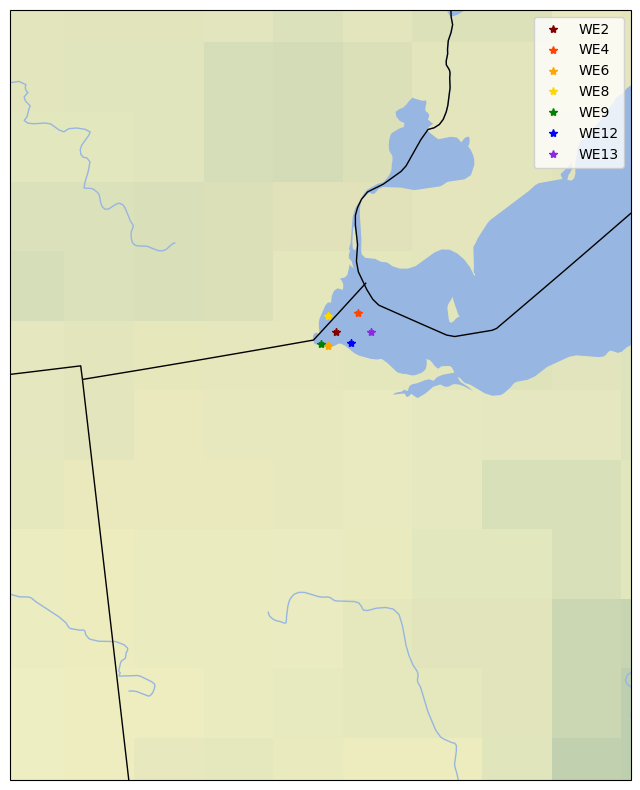

In [2]:
#define the spatial reference for the map
provinces_50m = cfeature.NaturalEarthFeature('cultural',
                                             'admin_1_states_provinces_lines',
                                             '50m',
                                             facecolor='none')

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

#create a figure and cubplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())

#add an image 
ax.stock_img()

#plot the sites based on the coordinates defined in the dataset
ax.plot(-83.330, 41.762, '*',  color = 'maroon', transform=ccrs.PlateCarree(), label = "WE2")
ax.plot(-83.193, 41.827, '*', color = 'orangered', transform=ccrs.PlateCarree(), label = 'WE4')
ax.plot(-83.385, 41.705, '*', color = 'orange', transform=ccrs.PlateCarree(), label = 'WE6')
ax.plot(-83.364, 41.834, '*', color = 'gold', transform=ccrs.PlateCarree(), label = 'WE8')

ax.plot(-83.424, 41.718, '*', color = 'green', transform=ccrs.PlateCarree(), label = "WE9")
ax.plot(-83.254, 41.703, '*',  color = 'blue', transform=ccrs.PlateCarree(), label = 'WE12')
ax.plot(-83.136, 41.741, '*', color = 'blueviolet', transform=ccrs.PlateCarree(), label = 'WE13')

#add all necessary features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(provinces_50m)
#add legend
ax.legend()

#set extent
ax.set_extent([-82, -85, 40, 43], ccrs.Geodetic())

This generated map using cartopy shows the sites where data was taken in the western basin of Lake Erie. The black lines represent the borders. Sites WE6, WE8, WE9, WE12 are closest to land (Littoral Zone) so they are likely to have the larger concentrations of nutrient concentrations than those further from land (Limnetic Zone).

# PART 1: Characterizing Nutrient Data & HABS Events


## Question 1
_Plot the Western Lake Erie nutrient data from 2012-2018. What trends or variations are visually? Does the variation over time correlate at all to historical HABS events? How? Do we see any correlation to site locations, are sites closer to land seeing higher nutrient concentrations?_

First, we will read in the data files. We have already separated the data into separate CSV files by site so we will write a function that can read in a file in this format. Then we will be able to loop through the files, naming them accordingly.  

In [3]:
#convert times to a datetime object when they are read in the format month-day-year

def tconvert(x):
     '''
    returns a datetime object for a string in the format month-day-year
    '''

     return dt.datetime.strptime(str(x), '%m/%d/%y')
    
#define a function that will read in the files
def nutrient_data_file_reader(filename):
     '''
    reads in a comma-separated file using genfromtxt that has dates in the format month-day-year which 
    will be converted to datetime objects using the converter defined above. File column names will be used to 
    parse the data
    '''

     return(np.genfromtxt(filename, delimiter = ',', converters = {0: tconvert}, encoding = 'utf-8',
                          names = True, dtype = None))
        
#create an array of all the file names for looping
filenames = ['WE2.csv', 'WE4.csv', 'WE6.csv', 'WE8.csv', 'WE9.csv', 'WE12.csv', 'WE13.csv']

#create an empty dictionary of nutrient data
nutrient_data = {}

#loop through all the files and add them to the dictionary of nutrient data
#the split function allows us to break up the filename so the key is just the site name without the .csv ending
for name in filenames:
    key = name.split('.')[0]
    nutrient_data[key] = nutrient_data_file_reader(name)

Next, we will plot all our nutrient data for the sites. We can write a loop to plot all the sites on the same plot using the `nutrient_data` dictionary defined above. We are most interested in nitorgen and phosphorus as these are the main nutrients associated with algal blooms, so our goal will be to plot <strong>Nitrate/Nitrite (N/N)</strong> and <strong>Total Dissolved Phosphorus (TDP). </strong>

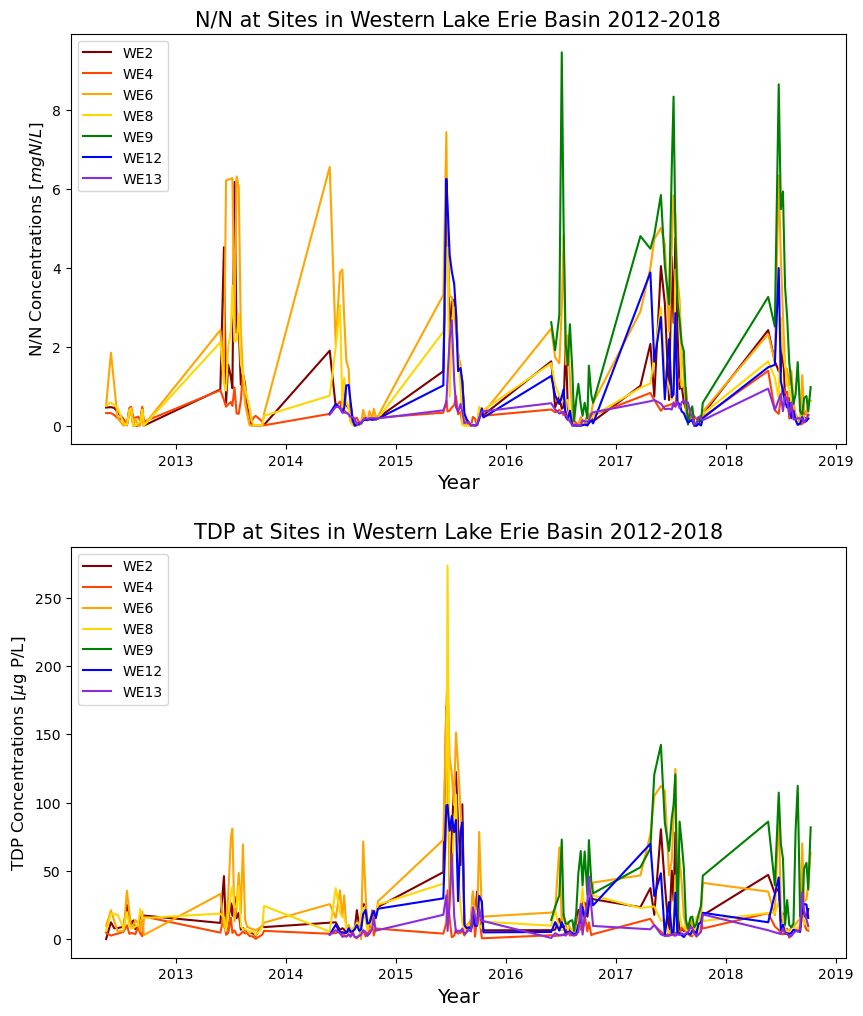

In [4]:
# we are interested in Nitrogen and Phosphorus concentrations at these sites so first we will plot this nutrient data
# for each of these sites
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 12))
plt.subplots_adjust(hspace=0.25)
# plot each site color the same as the map
count = 0
colors = ['maroon', 'orangered', 'orange', 'gold', 'green', 'blue', 'blueviolet']
for name in filenames:
    key = name.split('.')[0]
    color = colors[count]
    count = count + 1
    ax1.plot(nutrient_data[key]['\ufeffDate'], nutrient_data[key]['Nitrate_Nitrite'], label = key, color = color)
ax1.legend(loc='upper left')
ax1.set_xlabel('Year', fontsize='x-large')
ax1.set_ylabel('N/N Concentrations [$mg N/L$]', fontsize='large')
ax1.set_title('N/N at Sites in Western Lake Erie Basin 2012-2018', fontsize = 15)

count = 0
for name in filenames:
    key = name.split('.')[0]
    color = colors[count]
    count = count + 1
    ax2.plot(nutrient_data[key]['\ufeffDate'], nutrient_data[key]['Total_Dissolved_Phosphorus'], label = key, color = color)
ax2.legend(loc='upper left')
ax2.set_xlabel('Year', fontsize='x-large')
ax2.set_ylabel('TDP Concentrations [$\mu$g P/L]', fontsize='large')
ax2.set_title('TDP at Sites in Western Lake Erie Basin 2012-2018', fontsize = 15)
plt.show()

From these plots, we can see some inital trends in nutrient concentrations across all sites. Although the range of data values varies depending on the site, most sites follow a similar general trend. There seems to be one major peak in nutrients each year at all the sites. For some sites, the peak comes very rapidly, while for other sites, nutrient content seems to increase and dip more gradually through the year. Visually, it seems that there is a correlation between peaks in N/N and TDP. Two of the sites that have the highest nitrogen and phosphorus contents are sites that are very close to shore on the map, indicating runoff and wastewater could be playing a role in high nutrient concentration and potential HABs events. Interestingly WE4, which is located in the middle of the lake, shows some of the lowest nutrient contents. The largest HABs event recorded in the time period plotted occured in 2015. We see that there are higher than average nitrate/nitrite concentrations at some of the sites during that year, but more interestingly there is a more clear spike in phosphorus during that year. This is significant because phosphorus is considered the limiting nutrient for algae growth because it is in the shortest supply. 

## Question 2
_On a site specific level, do nitrogen and phosphorus concentrations correlate? Plot the nitrogen and phosphorus data for WE6, a coastal site. Is the correlation consistent or does it vary year to year? Find the correlation coefficient and pvalue between nitrogen and phosphorus at each site. What is the correlation? Does it vary depending on where a site is located?_

First, we will plot the nitrogen and phosphorus data for Site WE6 which is located near the coast. We want to see if, visually, the data seem correlated as a proxy for other coastal sites. 

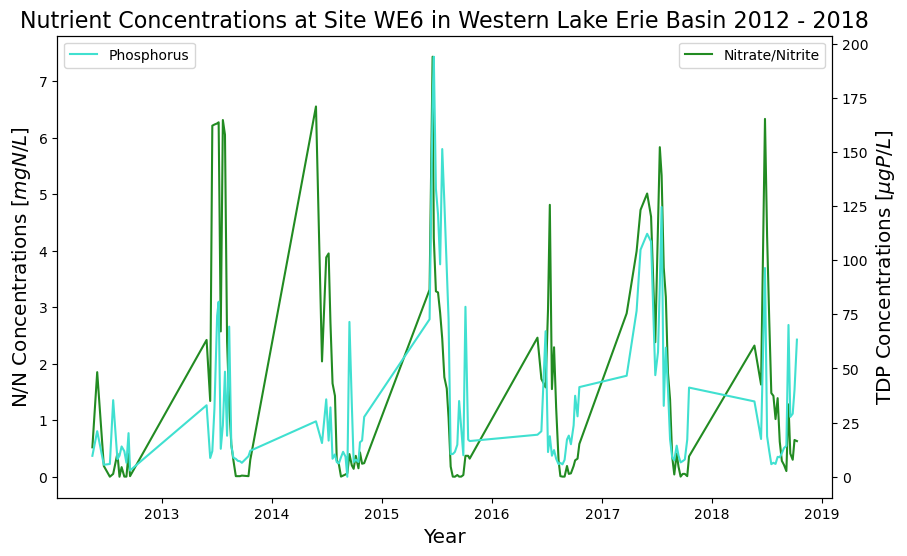

In [5]:
# Plot nitrogen and phosphorus at the same site on the same plot for comparison 

#create a figure with 1 subplot
fig, (ax1) = plt.subplots(1, 1, figsize = (10, 6))

#plot the nitrogen data
ax1.plot(nutrient_data['WE6']['\ufeffDate'], nutrient_data['WE6']['Nitrate_Nitrite'], label = 'Nitrate/Nitrite',
        color = "forestgreen")

#add label
ax1.set_ylabel('N/N Concentrations [$mg N/L$]', fontsize='x-large')

#create a twin axis 
ax2 = ax1.twinx()

#plot the TDP data
ax2.plot(nutrient_data['WE6']['\ufeffDate'], nutrient_data['WE6']['Total_Dissolved_Phosphorus'],
         label = 'Phosphorus', color = "turquoise")

#add plot elements (labels, legend, title) 
ax1.set_xlabel('Year', fontsize='x-large')
ax2.set_ylabel('TDP Concentrations [$\u00B5g P/L$]', fontsize='x-large')
ax1.set_title('Nutrient Concentrations at Site WE6 in Western Lake Erie Basin 2012 - 2018', fontsize = 16)
ax2.legend(loc = 'upper left')
ax1.legend(loc = 'upper right')
plt.show()

Visually, it seems like there is definitely some correlation between nitrogen and phosphorus levels. They seem to peak and dip at the same times throughout the year. Both nutrients hit their maximums during 2015, which is expected based on what we know about HABs events. However, in the year before, 2014, nitrogen also sees a large spike and there is almost no spike in phosphorus. This could be expected. As discussed before, phosphorus is the limiting nutrient in Lake Erie, so it might be more indicative of HABs events.   

Next, we will explicitly spell out the correlation coefficients and p values for nitrogen and phosphorus data at each of the sites. Because the data does not appear to show a linear relationship or a normal distribution, we want a measure that does not assume these things. We can use Kendall's $\tau$ which considers the relationship between all possible matchings of data pairs (finding concordant and discorant pairs). This is considered both a robust and resiliant measure. 

In [6]:
#import kendalltau to be able to find correlation 
from scipy.stats import kendalltau

#create an empty array of correlation coefficients that is the size of the number of files
corr_coeffs = [0] * np.size(filenames)

#create an empty array of pvalues that is the size of the number of files
pvalues = [0] * np.size(filenames)

#define count to loop through the arrays defined above 
count = 0

#write a loop to find the kendall tau correlation coefficient 
for name in filenames:
    #similar to before, we get the key by removing the .csv ending from the filename
    key = name.split('.')[0]
    #extract just nitrogen data
    Nitrogen = nutrient_data[key]['Nitrate_Nitrite']
    #extract just TDP data
    Phosphorus = nutrient_data[key]['Total_Dissolved_Phosphorus']
    #calculate the correlation
    corr_coeff, pvalue = kendalltau(Nitrogen, Phosphorus)
    print(f"The Kendall's \N{GREEK SMALL LETTER TAU} coefficient is {corr_coeff:.4f} and the pvalue is {pvalue:.5f}" 
          f"at Site {key}.")
    #add to an array of correlation coefficients for printing purposes later
    corr_coeffs[count] = corr_coeff
    #do the same for pvalues
    pvalues[count] = pvalue
    #increment count
    count = count + 1

The Kendall's τ coefficient is 0.2163 and the pvalue is 0.00026at Site WE2.
The Kendall's τ coefficient is 0.0298 and the pvalue is 0.61924at Site WE4.
The Kendall's τ coefficient is 0.4376 and the pvalue is 0.00000at Site WE6.
The Kendall's τ coefficient is 0.2457 and the pvalue is 0.00003at Site WE8.
The Kendall's τ coefficient is 0.3694 and the pvalue is 0.00004at Site WE9.
The Kendall's τ coefficient is 0.1998 and the pvalue is 0.00378at Site WE12.
The Kendall's τ coefficient is -0.0106 and the pvalue is 0.88122at Site WE13.


The Kendall's $\tau$ correlation coefficient shows moderate positive correlation for most sites, except for site WE13 which shows almost no correlation. Excluding WE13, WE4 is the site with the least correlation with a coefficient of 0.02 and a p-value of 0.62. It is of note that WE4 and WE13 are the sites closests to the middle of the lake. It is likely these sites receive less nitrogen/phosphorus input and see less algae overall. From the initial plots we can see that WE4 and WE13 nutrient contents for both of the nutrients assessed are on the low end, suggesting there is a potential minimum nutrient content required to see correlation between nitrogen and phosphorus. <strong> We will consider a strong positive relationship to be one where Kendall's </strong> $\tau$ <strong> is > 0.45 and a moderate relationship to be where Kendall's </strong> $\tau$ <strong> is > 0.27 </strong>. The strongest relationship is at Site WE6, the site plotted and also one of the most inward sites. The second highest correlation is for site WE9, which spatially, is very similar to WE6. The remainder of the sites have a <strong> Kendall </strong> $\tau$ <strong> value between 0.1 and 0.25, indicating weak-moderate relationships </strong>. Excluding WE4 and WE13, the p-value for all the is < 0.05 allowing us to say, statistically, it is unlikely the correlation is due to random chance, and we can reject the null hypothesis that there is no correlation. It is to note that while the correlation allows us to make some speculations, it does indicate any definitive causations.

## Question 3
_Do nutrient concentration patterns differ during a significant HABs year versus a mild HABs year in a way that would help predicate the occurance of a HABs event? What are the maximum, minimum, and average nitrogen and phosphorus levels at site WE12 during a significant HABs year like 2015 versus a mild HABs year like 2016? Plot the nutrient data for these two years. What is the correlation between nitrogen and phosphorus for each year?_

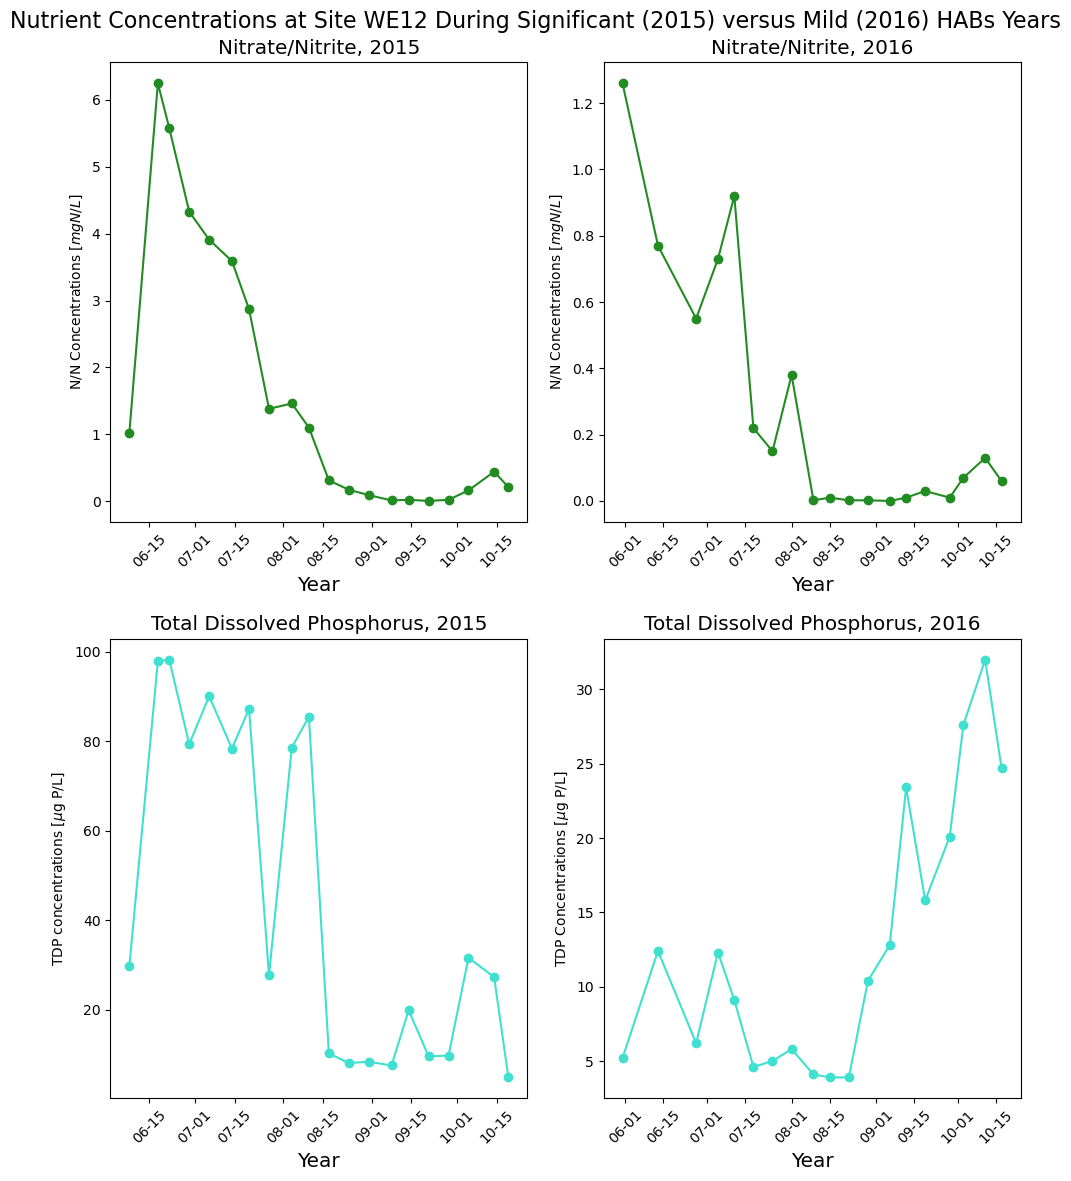

In [7]:
#extract data for just 2015 for site WE12 using the dates datetime column
WE12_2015 = [row for row in nutrient_data['WE12'] if row['\ufeffDate'].year == 2015]

#define a function that will allow us to extract nutrient data from the data subsets
def extract_values(dataset, nutrient):
    '''
    Allows us to easily extract a specific subset of data based on the column name, in the parameters 
    this is 'nutrient'. Returns all data in a specified dataset for that nutrient
    '''
    return([row[nutrient] for row in dataset])

#Extract just the dates from the 2015 sub-data (this will be the x-axis)
dates_2015 = extract_values( WE12_2015, '\ufeffDate')
    
#Extract just nutrient info from the 2015 sub-data (this will be the y-axis)
Nvalues_2015 = extract_values(WE12_2015,'Nitrate_Nitrite')

#define a figure 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 12))

#plot the nitrogen data as a line with dots
ax1.plot(dates_2015, Nvalues_2015, 'o-', color = 'forestgreen')

#as for 2015, extract data for just 2016 for site WE12 using the dates datetime column 
WE12_2016 = [row for row in nutrient_data['WE12'] if row['\ufeffDate'].year == 2016]

#Extract just the dates from the 2016 sub-data (this will be the x-axis)
dates_2016 = extract_values( WE12_2016, '\ufeffDate')

#Extract just nutrient info from the 2016 sub-data (this will be the y-axis)
Nvalues_2016 = extract_values(WE12_2016,'Nitrate_Nitrite')

#plot the nitrogen data as a line with dots
ax2.plot(dates_2016, Nvalues_2016, 'o-', color = 'forestgreen')

#add plot elements to ax1 (labels, legend, title) 
ax1.set_title('Nitrate/Nitrite, 2015', fontsize='x-large')
ax1.set_xlabel('Year', fontsize='x-large')
ax1.set_ylabel('N/N Concentrations [$mg N/L$]')
ax1.tick_params(axis = 'x', rotation = 45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

#add plot elements to ax2 (labels, legend, title) 
ax2.set_title('Nitrate/Nitrite, 2016', fontsize='x-large')
ax2.set_xlabel('Year', fontsize='x-large')
ax2.set_ylabel('N/N Concentrations [$mg N/L$]')
ax2.tick_params(axis = 'x', rotation=45)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

#Extract just TDP info from the 2015 sub-data (this will be the y-axis)
Pvalues_2015 = extract_values(WE12_2015,'Total_Dissolved_Phosphorus')

#plot the TDP data as lines with dots 
ax3.plot(dates_2015, Pvalues_2015, 'o-', color = 'turquoise')

#Extract just TDP info from the 2016 sub-data (this will be the y-axis)
Pvalues_2016 = extract_values(WE12_2016, 'Total_Dissolved_Phosphorus')

#plot the TDP data as lines with dots 
ax4.plot(dates_2016, Pvalues_2016, 'o-', color = 'turquoise')

#add plot elements to ax3 (labels, legend, title) 
ax3.set_title('Total Dissolved Phosphorus, 2015', fontsize='x-large')
ax3.set_xlabel('Year', fontsize='x-large')
ax3.set_ylabel('TDP concentrations [$\mu$g P/L]')
ax3.tick_params(axis = 'x', rotation = 45)
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

#add plot elements to ax4 (labels, legend, title) 
ax4.set_title('Total Dissolved Phosphorus, 2016', fontsize='x-large')
ax4.set_xlabel('Year', fontsize='x-large')
ax4.set_ylabel('TDP Concentrations [$\mu$g P/L]')
ax4.tick_params(axis = 'x', rotation = 45)
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

#give the figure an overarching title 
fig.suptitle('Nutrient Concentrations at Site WE12 During Significant (2015) versus Mild (2016) HABs Years', fontsize = 16)

#adjust the figure layout
plt.tight_layout(h_pad = 1.5, w_pad = 1.5)

Similar to before, we want to quantify the visual relationships in these plots. To do this, we will calculate some basic statistics like maximums, minimums, and averages.

In [8]:
#statistics for the above plots 

#define an array of the data plotted above 
data = [Nvalues_2015, Nvalues_2016,  Pvalues_2015, Pvalues_2016]

#define names that can be used in print statements for above data
names = ["Nitrogen 2015 (mg/L)","Nitrogen 2016 (mg/L)", "TDP 2015 (\u00B5g P/L)", "TDP 2016 (\u00B5g P/L)"]

#counter
i = 0

#loop through the data and find the max, min, and average value
#print out these values
for x in data: 
    max = np.max(x)
    min = np.min(x)
    average = np.average(x)
    print(f'The maximum value in {names[i]} is {np.round(max, 3)}. The minimum '
           f'value is {np.round(min, 3)}. The average value is {np.round(average, 3)}.')
    i = i + 1 
    
#add a space
print()

#print the Kendall Tau correlation and pvalue for 2015 and 2016 nutrients
corr_coeff_2015, pvalue_2015 = kendalltau(Nvalues_2015, Pvalues_2015)

corr_coeff_2016, pvalue_2016 = kendalltau(Nvalues_2016, Pvalues_2016)

print(f'The Kendall \N{GREEK SMALL LETTER TAU} correlation between nitrogen and phosphorus in the 2015 '
      f'(significant) HABs year was {np.round(corr_coeff_2015, 3)}.'
f'with a pvalue of {np.round(pvalue_2015, 5)}.')
print(f'The Kendall \N{GREEK SMALL LETTER TAU} correlation between nitrogen and phosphorus in the 2016 '
      f'(mild) HABs year was {np.round(corr_coeff_2016, 3)} with a pvalue of {np.round(pvalue_2016, 3)}.')

The maximum value in Nitrogen 2015 (mg/L) is 6.25. The minimum value is 0.002. The average value is 1.646.
The maximum value in Nitrogen 2016 (mg/L) is 1.26. The minimum value is 0.0. The average value is 0.279.
The maximum value in TDP 2015 (µg P/L) is 98.27. The minimum value is 4.92. The average value is 44.53.
The maximum value in TDP 2016 (µg P/L) is 32.0. The minimum value is 3.9. The average value is 12.595.

The Kendall τ correlation between nitrogen and phosphorus in the 2015 (significant) HABs year was 0.67.with a pvalue of 4e-05.
The Kendall τ correlation between nitrogen and phosphorus in the 2016 (mild) HABs year was 0.048 with a pvalue of 0.778.


From the plots and statistics above, we can see that nutrient data shows very different trends and values in a significant HAB year versus a mild HAB year. The peak nitrogen in 2015 was almost 6 times the peak nitrogen in 2016, and the peak phosphorus was over 3 times as high in 2015 versus 2016. The same trend is true for average values. We also see that the correlation between nitrogen and phosphorus is much higher during the HABs year versus the non-HABs year. There is almost no correlation between the nutrients in 2016, but a high correlation in 2015. This indicates that we should pay attention to nitrogen and phosphorus correlation in assessing HABs events. 

We will make the same set of plots for the same years at a different site to confirm these results are consistent across multiple locations. The next site we will look at is WE6.

Comparing TDP and N/N concentrations to each other in a significant HAB versus a mild HAB year may indicate that when both phosphorus and nitrate/nitrite concentrations in Lake Erie increase at the same time a significant HAB year will occur. This theory can only be confirmed by plotting multiple significant/mild HAB years and their respective phosphorus and nitrate/nitrite concentration trends.

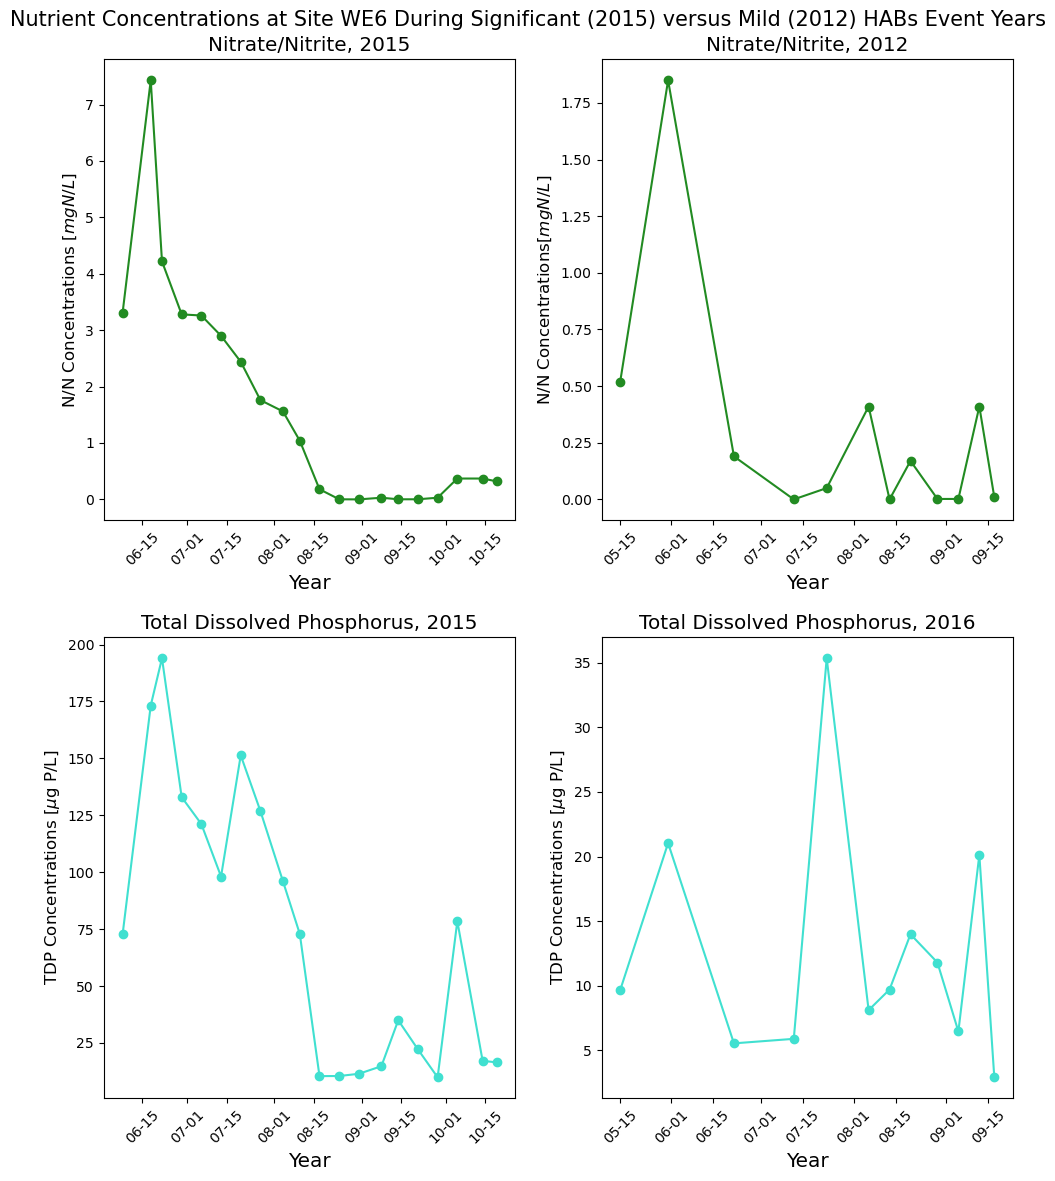

In [9]:
#WE6 N/N and TDP concentrations in 2015 (HAB year) vs 2012 (non-HAB year)
WE6_2015 = [row for row in nutrient_data['WE6'] if row[0].year == 2015]

#Extract datetime values and measurements
dates6_2015 = np.array([row[0] for row in WE6_2015])
N6values_2015 = [row['Nitrate_Nitrite'] for row in WE6_2015]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 12))
ax1.scatter(dates6_2015, N6values_2015,  color = 'forestgreen')
ax1.plot(dates6_2015, N6values_2015,  color = 'forestgreen')

WE6_2012 = [row for row in nutrient_data['WE6'] if row[0].year == 2012]
# Extract datetime values and measurements
dates6_2012 = np.array([row[0] for row in WE6_2012])
N6values_2012 = [row['Nitrate_Nitrite'] for row in WE6_2012]

ax2.scatter(dates6_2012, N6values_2012, color = 'forestgreen')
ax2.plot(dates6_2012, N6values_2012, color = 'forestgreen')

ax1.set_title('Nitrate/Nitrite, 2015', fontsize='x-large')
ax1.set_xlabel('Year', fontsize='x-large')
ax1.set_ylabel('N/N Concentrations [$mg N/L$]', fontsize='large')
ax1.tick_params(axis = 'x', rotation = 45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax2.set_title('Nitrate/Nitrite, 2012', fontsize='x-large')
ax2.set_xlabel('Year', fontsize='x-large')
ax2.set_ylabel('N/N Concentrations[$mg N/L$]', fontsize='large')
ax2.tick_params(axis = 'x', rotation=45)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

P6values_2015 = [row['Total_Dissolved_Phosphorus'] for row in WE6_2015]
ax3.scatter(dates6_2015, P6values_2015, color = 'turquoise')
ax3.plot(dates6_2015, P6values_2015, color = 'turquoise')
ax3.tick_params(axis = 'x', rotation = 45)

P6values_2012 = [row['Total_Dissolved_Phosphorus'] for row in WE6_2012]
ax4.scatter(dates6_2012, P6values_2012, color = 'turquoise')
ax4.plot(dates6_2012, P6values_2012, color = 'turquoise')
ax4.tick_params(axis = 'x', rotation = 45)

ax3.set_title('Total Dissolved Phosphorus, 2015', fontsize='x-large')
ax3.set_xlabel('Year', fontsize='x-large')
ax3.set_ylabel('TDP Concentrations [$\mu$g P/L]', fontsize='large')
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax4.set_title('Total Dissolved Phosphorus, 2016', fontsize='x-large')
ax4.set_xlabel('Year', fontsize='x-large')
ax4.set_ylabel('TDP Concentrations [$\mu$g P/L]', fontsize='large')
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

fig.suptitle('Nutrient Concentrations at Site WE6 During Significant (2015) versus Mild (2012) HABs Event Years', fontsize = 15)
plt.tight_layout(h_pad = 1.5, w_pad = 1.5)

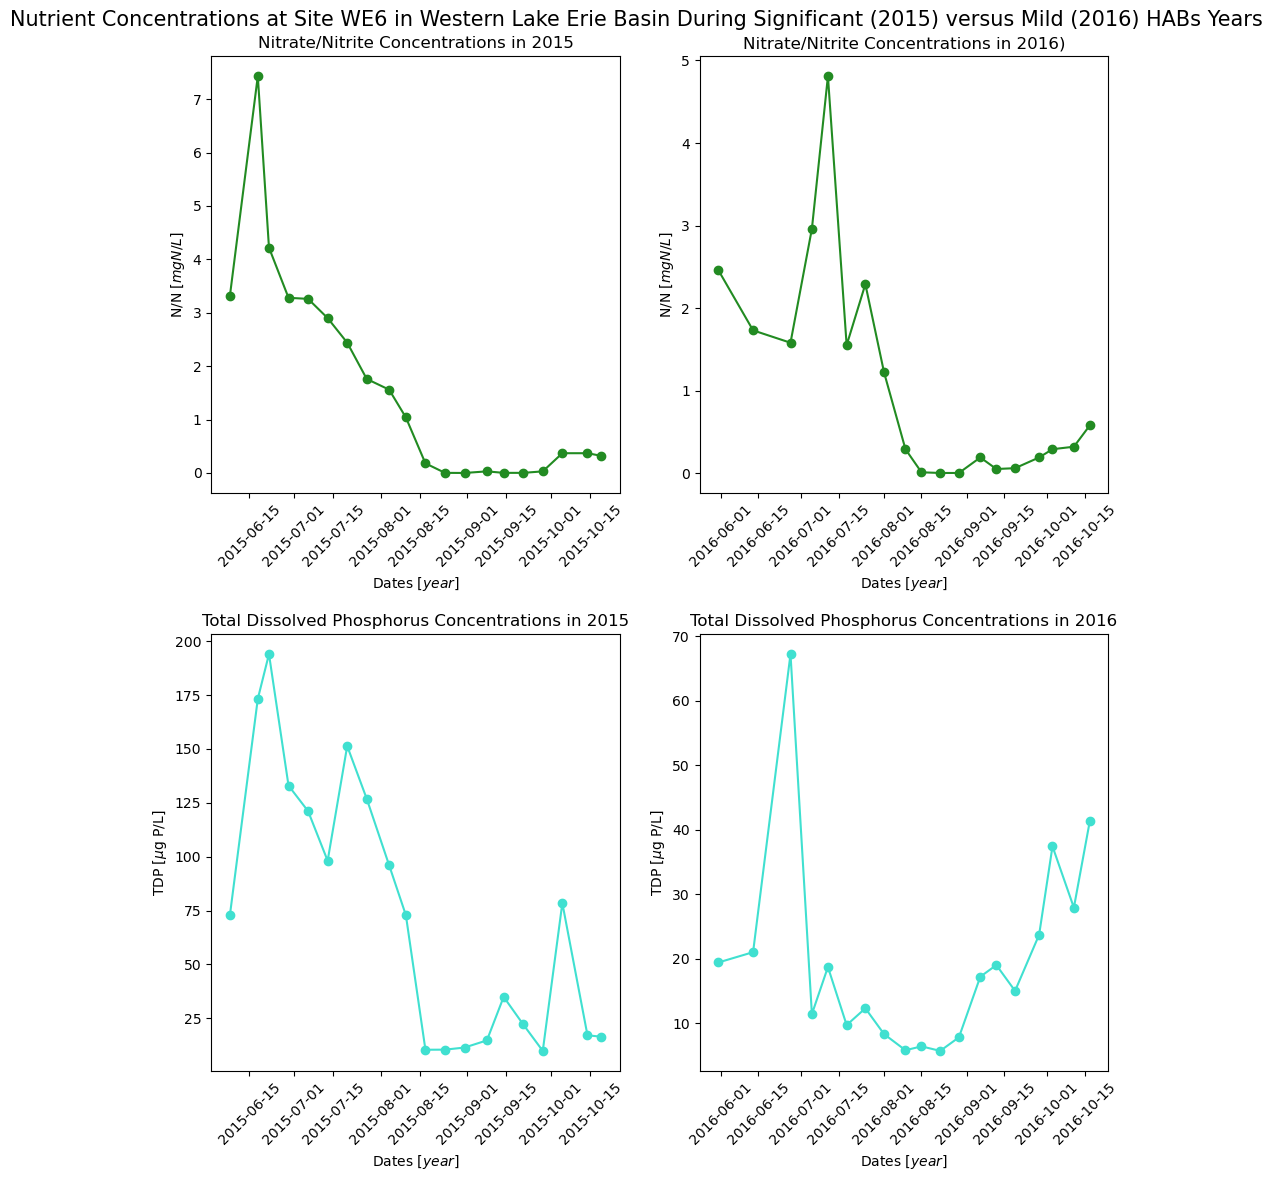

In [10]:
#WE6 N/N and TDP concentrations in 2015 (HAB year) vs 2016 (non-HAB year)
WE6_2015 = [row for row in nutrient_data['WE6'] if row[0].year == 2015]

#Extract datetime values and measurements
dates6_2015 = np.array([row[0] for row in WE6_2015])
N6values_2015 = [row['Nitrate_Nitrite'] for row in WE6_2015]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 12))
ax1.scatter(dates6_2015, N6values_2015,  color = 'forestgreen')
ax1.plot(dates6_2015, N6values_2015,  color = 'forestgreen')

WE6_2016 = [row for row in nutrient_data['WE6'] if row[0].year == 2016]
# Extract datetime values and measurements
dates6_2016 = np.array([row[0] for row in WE6_2016])
N6values_2016 = [row['Nitrate_Nitrite'] for row in WE6_2016]

ax2.scatter(dates6_2016, N6values_2016, color = 'forestgreen')
ax2.plot(dates6_2016, N6values_2016, color = 'forestgreen')

ax1.set_title('Nitrate/Nitrite Concentrations in 2015')
ax1.set_xlabel('Dates [$year$]')
ax1.set_ylabel('N/N [$mg N/L$]')
ax1.tick_params(axis = 'x', rotation = 45)
ax2.set_title('Nitrate/Nitrite Concentrations in 2016)')
ax2.set_xlabel('Dates [$year$]')
ax2.set_ylabel('N/N [$mg N/L$]')
ax2.tick_params(axis = 'x', rotation=45)

P6values_2015 = [row['Total_Dissolved_Phosphorus'] for row in WE6_2015]
ax3.scatter(dates6_2015, P6values_2015, color = 'turquoise')
ax3.plot(dates6_2015, P6values_2015, color = 'turquoise')
ax3.tick_params(axis = 'x', rotation = 45)

P6values_2016 = [row['Total_Dissolved_Phosphorus'] for row in WE6_2016]
ax4.scatter(dates6_2016, P6values_2016, color = 'turquoise')
ax4.plot(dates6_2016, P6values_2016, color = 'turquoise')
ax4.tick_params(axis = 'x', rotation = 45)

ax3.set_title('Total Dissolved Phosphorus Concentrations in 2015')
ax3.set_xlabel('Dates [$year$]')
ax3.set_ylabel('TDP [$\mu$g P/L]')
ax4.set_title('Total Dissolved Phosphorus Concentrations in 2016')
ax4.set_xlabel('Dates [$year$]')
ax4.set_ylabel('TDP [$\mu$g P/L]')

fig.suptitle('Nutrient Concentrations at Site WE6 in Western Lake Erie Basin During Significant (2015) versus Mild (2016) HABs Years', fontsize = 15)
plt.tight_layout(h_pad = 1.5, w_pad = 1.5)

When looking at the nutrient data for WE6, it appears that during significant HAB years the nutrient concentrations are higher in scale and have peaks at similar time-frames. When looking at mild HAB years, the opposite trend is seen: nutrient concentrations are lower in scale and their peaks are asynchronous. Below are tables of maximum nitrate/nitrite and total dissolved phosphorus concentrations for each station between 2012-2018.

$$
\begin{aligned}
&\textbf{Table 1. WE2 Nitrate/Nitrite and Total Dissolved Phosphorus Concentrations from 2012-2018} \\
&\begin{array}{cccc}
\hline \hline \text { Year } & \text { N/N [mg N/L]} & \text { TDP [$\mu$g P/L]} & \text {HAB Year Type} \\
\hline \text {2012} & 0.47 & 25.05 & \text{Mild} \\
\text {2013} & 6.17 & 46.1 & \text{Significant} \\
\text {2014} & 1.9 & 25.57 & \text{Significant} \\
\text {2015} & 5.19 & 170.76 & \text{Significant} \\
\text {2016} & 2.15 & 30.5 & \text{Mild} \\
\text {2017} & 4.75 & 80.44 & \text{Significant} \\
\text {2018} & 2.42 & 47.05 & \text{Mild} \\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \textbf{Table 2. WE4 Nitrate/Nitrite and Total Dissolved Phosphorus Concentrations from 2012-2018} \\
&\begin{array}{cccc}
\hline \hline \text { Year } & \text { N/N [mg N/L]} & \text { TDP [$\mu$g P/L]} & \text {HAB Year Type} \\
\hline \text {2012} & 0.48 & 16.54 & \text{Mild} \\
\text {2013} & 1.33 & 16.75 & \text{Significant} \\
\text {2014} & 0.61 & 21.03 & \text{Significant} \\
\text {2015} & 0.75 & 35.68 & \text{Significant} \\
\text {2016} & 0.41 & 17.3 & \text{Mild} \\
\text {2017} & 1.18 & 14.82 & \text{Significant} \\
\text {2018} & 1.39 & 19.01 & \text{Mild} \\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \textbf{Table 3. WE6 Nitrate/Nitrite and Total Dissolved Phosphorus Concentrations from 2012-2018} \\
&\begin{array}{cccc}
\hline \hline \text { Year } & \text { N/N [mg N/L]} & \text { TDP [$\mu$g P/L]} & \text {HAB Year Type} \\
\hline \text {2012} & 1.85 & 35.36 & \text{Mild} \\
\text {2013} & 6.31 & 80.82 & \text{Significant} \\
\text {2014} & 6.55 & 71.5 & \text{Significant} \\
\text {2015} & 7.43 & 194 & \text{Significant} \\
\text {2016} & 4.81 & 67.2 & \text{Mild} \\
\text {2017} & 5.83 & 124.59 & \text{Significant} \\
\text {2018} & 6.33 & 96.4 & \text{Mild} \\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \textbf{Table 4. WE8 Nitrate/Nitrite and Total Dissolved Phosphorus Concentrations from 2012-2018} \\
&\begin{array}{cccc}
\hline \hline \text { Year } & \text { N/N [mg N/L]} & \text { TDP [$\mu$g P/L]} & \text {HAB Year Type} \\
\hline \text {2012} & 0.59 & 21.99 & \text{Mild} \\
\text {2013} & 3.55 & 38.88 & \text{Significant} \\
\text {2014} & 3.05 & 37.32 & \text{Significant} \\
\text {2015} & 4.52 & 273.58 & \text{Significant} \\
\text {2016} & 1.58 & 37.4 & \text{Mild} \\
\text {2017} & 3.96 & 46.59 & \text{Significant} \\
\text {2018} & 2.73 & 26.86 & \text{Mild} \\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \textbf{Table 5. WE9 Nitrate/Nitrite and Total Dissolved Phosphorus Concentrations from 2016-2018} \\
&\begin{array}{cccc}
\hline \hline \text { Year } & \text { N/N [mg N/L]} & \text { TDP [$\mu$g P/L]} & \text {HAB Year Type} \\
\text {2016} & 9.45 & 72.9 & \text{Mild} \\
\text {2017} & 8.33 & 142.27 & \text{Significant} \\
\text {2018} & 8.64 & 112.3 & \text{Mild} \\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \textbf{Table 6. WE12 Nitrate/Nitrite and Total Dissolved Phosphorus Concentrations from 2014-2018} \\
&\begin{array}{cccc}
\hline \hline \text { Year } & \text { N/N [mg N/L]} & \text { TDP [$\mu$g P/L]} & \text {HAB Year Type} \\
\text {2014} & 1.03 & 22.23 & \text{Significant} \\
\text {2015} & 6.25 & 98.27 & \text{Significant} \\
\text {2016} & 1.26 & 32 & \text{Mild} \\
\text {2017} & 3.88 & 69.78 & \text{Significant} \\
\text {2018} & 3.99 & 45.1 & \text{Mild} \\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \textbf{Table 7. WE13 Nitrate/Nitrite and Total Dissolved Phosphorus Concentrations from 2014-2018} \\
&\begin{array}{cccc}
\hline \hline \text { Year } & \text { N/N [mg N/L]} & \text { TDP [$\mu$g P/L]} & \text {HAB Year Type} \\
\text {2014} & 0.48 & 15.29 & \text{Significant} \\
\text {2015} & 2.67 & 62.54 & \text{Significant} \\
\text {2016} & 0.57 & 45.9 & \text{Mild} \\
\text {2017} & 0.65 & 18.03 & \text{Significant} \\
\text {2018} & 0.94 & 34.28 & \text{Mild} \\
\hline
\end{array}
\end{aligned}
$$

As seen by the max concentrations versus significant/mild HAB years, it appears that during higher concentrations the HAB year is often significant. However, there are cases where this isn't true. For example, for WE6 in 2016: both N/N and TDP appear to be high, but as seen in the earlier plots, these peaks in concentration occur asynchronously. This points to a trend where <strong>two conditions must be met to have a significant HAB year: (1) high nutrient concentrations and (2) peak nutrient concentrations occurring synchronously.</strong>

## Question 4
_Assess the correlation between all nutrients across all years. Identify if correlation is stronger for certain nutrients, or for certain sites. What sites are most correlated, is there a spatial relationship? What nutrients are most correlated, is it what we would expect?_

Because the data files we have are separated by site and the sizes are different, we will have to manipulate them for comparison. The strategy used for the question below was to remove any data points from the larger of the two datasets being compared that the smaller one did not have. The edited file was then re-uploaded.

Additionally, both Littoral (coastal) and Limnetic (further from land) zone sites will be compared to understand spatial relationships of nutrients.

To answer this question, we are going to focus on making correlation matrices that compare all nutrient measures for two different sites. First, we are going to assess the relationship between WE6, our most coastal site, and WE13, which is one of the most mid-lake sites we have. We will compare the correlation matrix for these two sites with one for WE6 and WE9, two sites which are both coastal and close together. 

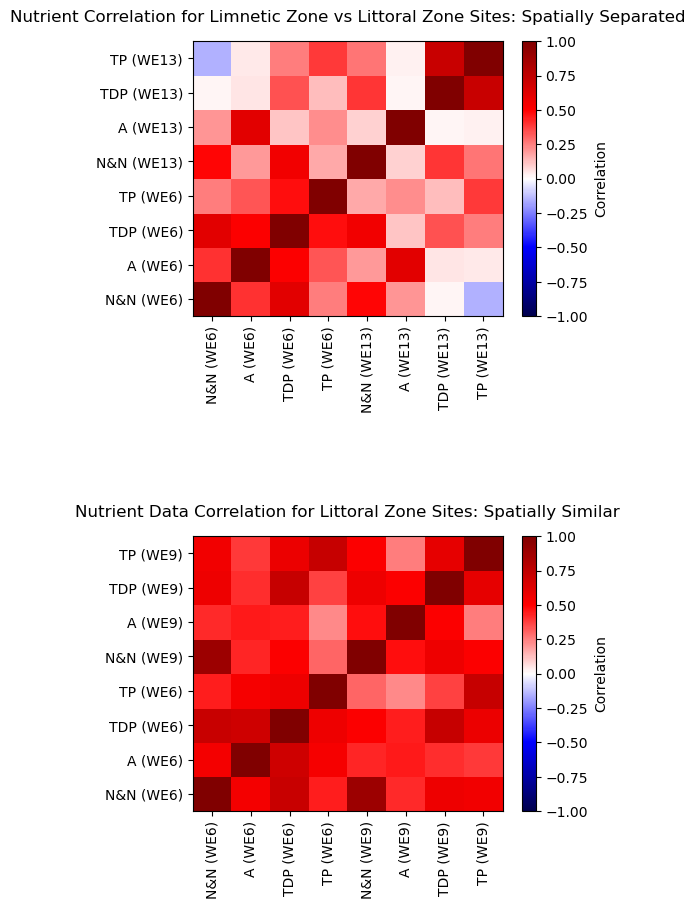

In [11]:
#we are first going to compare WE6 to WE13, WE6 is the larger dataset

#upload the reformatted WE6 file so all data points match WE13 file
WE6_reformat = nutrient_data_file_reader('WE6_Reformat.csv')


#extract the nitrogen data
N_WE6 = WE6_reformat['Nitrate_Nitrite']

#extract the ammonia data 
A_WE6 = WE6_reformat['Ammonia']

#extract the TDP data
TDP_WE6 = WE6_reformat['Total_Dissolved_Phosphorus']

#extract the TP data
P_WE6 = WE6_reformat['TotalPhosphorus']

#extract the nitrogen data
N_WE13 = nutrient_data['WE13']['Nitrate_Nitrite']

#extract the ammonia data 
A_WE13 = nutrient_data['WE13']['Ammonia']

#extract the TDP data
TDP_WE13 = nutrient_data['WE13']['Total_Dissolved_Phosphorus']

#extract the TP data
P_WE13 = nutrient_data['WE13']['TotalPhosphorus']

#stack all the results together into one result set to be used for comparison
results = np.column_stack((N_WE6, A_WE6 , TDP_WE6, P_WE6, N_WE13,A_WE13, TDP_WE13, P_WE13))

#transpose the column stack result 
dataT = results.T

# Get the correlation coeff matrix:
#we expect the diagonal to be 1s bc it is the correlation of a variable with itself
cc = np.corrcoef(dataT)

# Create a figure and add an axes object:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5, 10))

#adjust spacing between subplots
plt.subplots_adjust(hspace=0.8)

#Create the "pcolor" object while plotting it to the axes.
#Use our pcolor object to create a colorbar.
pcol = ax1.pcolor(cc, cmap='seismic', vmin=-1., vmax=1.)
cbar = plt.colorbar(pcol, ax=ax1)
cbar.set_label('Correlation')

#Set labels and location of labels

#N&N = Nitrate/Nitrite
#A = Ammonia
#TDP = total dissolved phosphorus
#TP = total phosphorus
labels = ['N&N (WE6)', 'A (WE6)', 'TDP (WE6)','TP (WE6)', 'N&N (WE13)', 'A (WE13)', 'TDP (WE13)', 'TP (WE13)']
locs = np.arange(0, 8, 1.) + .5

#Make everything line up properly
ax1.set_xticks(locs, labels, rotation= 'vertical')
ax1.set_yticks(locs, labels)

#Title
ax1.set_title('Nutrient Correlation for Limnetic Zone vs Littoral Zone Sites: Spatially Separated', pad=14)
#A Limnetic Zone is towards the middle of a lake, far into the deeper part of a body of water --> further from land!

##NEXT CODE BLOCK IS ALMOST IDENTICAL TO ABOVE FOR DIFFERENT SITES (WE6 and WE9)

#next we are going to compare WE6 to WE9, WE6 is the larger dataset
#upload the reformatted WE6 file so all data points match WE9 file
WE6_reformat_2 = np.genfromtxt('WE6_Reformat_2.csv', delimiter=',', converters={0: tconvert}, 
                               encoding='utf-8', names=True, dtype=None)

#extract the nitrogen data
N_WE6 = WE6_reformat_2['Nitrate_Nitrite']

#extract the ammonia data 
A_WE6 = WE6_reformat_2['Ammonia']

#extract the TDP data
TDP_WE6 = WE6_reformat_2['Total_Dissolved_Phosphorus']

#extract the TP data
P_WE6 = WE6_reformat_2['TotalPhosphorus']

#Do the same extractions for WE()
N_WE9 = nutrient_data['WE9']['Nitrate_Nitrite']
A_WE9 = nutrient_data['WE9']['Ammonia']
TDP_WE9 = nutrient_data['WE9']['Total_Dissolved_Phosphorus']
P_WE9 = nutrient_data['WE9']['TotalPhosphorus']

#add the results together using column stack
results = np.column_stack((N_WE6, A_WE6 , TDP_WE6, P_WE6, N_WE9,A_WE9, TDP_WE9, P_WE9))

#transpose the results 
dataT = results.T

#Get the correlation coeff matrix:
#we expect the diagonal to be 1s bc it is the correlation of a variable with itself
cc = np.corrcoef(dataT)


#Create the "pcolor" object while plotting it to the axes.
#Use our pcolor object to create a colorbar.
pcol = ax2.pcolor(cc, cmap = 'seismic', vmin = -1., vmax = 1.)
cbar = plt.colorbar(pcol, ax = ax2)
cbar.set_label('Correlation')

#Set labels and location
labels = ['N&N (WE6)', 'A (WE6)', 'TDP (WE6)','TP (WE6)', 'N&N (WE9)', 'A (WE9)', 'TDP (WE9)', 'TP (WE9)']
locs = np.arange(0, 8, 1.) + .5

#Make sure everything lines up 
ax2.set_xticks(locs, labels, rotation = 'vertical')
ax2.set_yticks(locs, labels)

#Title our axes:
ax2.set_title('Nutrient Data Correlation for Littoral Zone Sites: Spatially Similar', pad=14)
#A Littoral Zone is closest to the coast of a body of water, so near land!

plt.show()

In plotting these correlation matrices, we can see how the entire data samples from one site compare against all of the data samples taken from another site. 

Firstly, we plot two sites which are much further apart. The station WE6 is on the coast, while WE13 is on the middle of the lake. This can tell us more about how different location on the lake are correlated accross Phosphorus, Ammonia, and Nitrite concentrations. 

Secondly, we compare WE6 and WE9 which are very close to each on Lake Erie. They are both on the coast and near Toledo. Unsurprisngly, due to their closeness, the Nitrite, Ammonia, and Phosphorus concentrations samples collected are very simialr between sites. We can see the Nitrite concentration between WE6 and WE9 is the most correlated.

Interestingly, we can see the Ammonia concentration at WE9 has very little correlation to the Total Phosphorus at WE6, but the opposite isn't true. The Ammonia concentration at WE6 is considerably correlated to teh Phosphorus concentration at WE9. 


As we can see in the plot, the nutrients for sites WE6 and WE13 are much less correlated than those of WE6 and WE9.

While the correlation between nutrients at site WE6 and WE9 was promising, these sites are the closest together of any of the sites. We wanted to distinguish closeness from a relationship between coastal sites. So, next, we will look at the correlation matrix for WE6 and WE8, two sites that are not close in proximity, but are both coastal. 

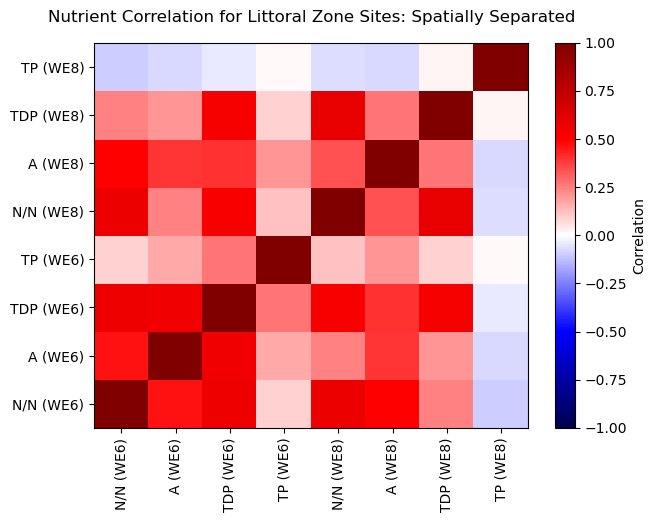

In [12]:
#these data files were exactly the same size with matching dates, so we did not have to do any manipulation here

#extract nitrate/nitrite
n_N_WE6 = nutrient_data['WE6']['Nitrate_Nitrite']

#extract ammonia
n_A_WE6 = nutrient_data['WE6']['Ammonia']

#extract TDP
n_TDP_WE6 = nutrient_data['WE6']['Total_Dissolved_Phosphorus']

#extract TP
n_P_WE6 = nutrient_data['WE6']['TotalPhosphorus']

#Do the same nutrient extraction for site WE8
N_WE8 = nutrient_data['WE8']['Nitrate_Nitrite']
A_WE8 = nutrient_data['WE8']['Ammonia']
TDP_WE8 = nutrient_data['WE8']['Total_Dissolved_Phosphorus']
P_WE8 = nutrient_data['WE8']['TotalPhosphorus']


#add all the results together into one contiguous result set 
results = np.column_stack((n_N_WE6, n_A_WE6 , n_TDP_WE6, n_P_WE6, N_WE8,A_WE8, TDP_WE8, P_WE8))

#transpose the data
dataT = results.T

# Get the correlation coeff matrix:
#we expect the diagonal to be 1s bc it is the correlation of a variable with itself
cc = np.corrcoef(dataT)

#define a figure with 1 subplot
fig, (ax2) = plt.subplots( 1, figsize = (7, 5))

# Create the "pcolor" object while plotting it to the axes.
# Use our pcolor object to create a colorbar.
pcol = ax2.pcolor(cc, cmap='seismic', vmin=-1., vmax=1.)
cbar = plt.colorbar(pcol, ax=ax2)
cbar.set_label('Correlation')

# Set labels and label locations
labels = ['N/N (WE6)', 'A (WE6)', 'TDP (WE6)','TP (WE6)', 'N/N (WE8)', 'A (WE8)', 'TDP (WE8)','TP (WE8)']
locs = np.arange(0, 8, 1.) + .5

# Now, set our ticks and labels
ax2.set_xticks(locs, labels, rotation= 'vertical')
ax2.set_yticks(locs, labels)

# Title our axes:
ax2.set_title('Nutrient Correlation for Littoral Zone Sites: Spatially Separated', pad=15)
plt.show()

Here, we have plotted two stations that are located on the coast of Lake Erie but are not close to each other. This will allow us to make some inferences on coastal station samples compared to each. Combined with our other correlation matrices, we can have a more well-rounded view of how nutrient concentrations compare on the land and in the middle of the lake. WE6 is the coastal site located near Toledo, and WE8 is the site on the coast near Monroe, Michigan making it also closer to Detroit than WE6. 

From this matrix, we can quickly see that the Phosphorus concentration at both sites doesn't correlate considerably with the other variables plotted. Furthermore, the Phosphorus concentration at WE8 correlated negatively with all other variables, both to those of its own site and those of WE6. 
Furthermore, the correlation between variables at WE6 is much more consistent and high than the correlation between variables within WE8.

Although sites that are further east into Lake Erie will naturally show lower nutrient concentrations due to mixing, its correlation to the station WE6 shows how much lake areas close to land are affected by nutrient concentrations. The correlation matrix comparing WE6 and WE9 further shows this high impact due to nutrients.

## Question 5
_While nutrient levels can be impacted by external factors, they can also be impacted by climatic factors. Generally, warmer waters tend to aid the growth of algae. We want to find out, what are the trends in temerpature around Lake Erie for the time period being studied? Is there any relationship between nutrient concentrations and water temperatures. What is the highest yearly frequency associated with temperature data? How does a year of temperature data compare to a year of nutrient data?_

To answer this question, we will first plot daily temperature data from the surface of Lake Erie. Then, we will take the FFT of that data to try and figure out what the highest frequency and associated period in the data is.

The highest frequency in this dataset is 0.8744010951403148 and the associted period is 1.1436399217221136.


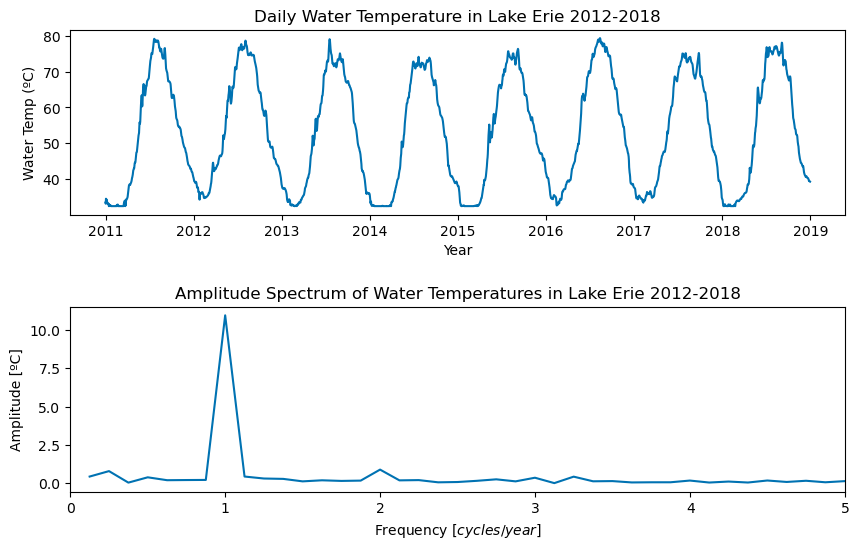

In [13]:
#define the variable names 
varnames = ['Date', 'WaterTemps']

#Load water data without converters
lake_erie_temps = np.genfromtxt('Water_Temps_2012_2018.csv', delimiter = ',', names = varnames, dtype = None, 
                                encoding = 'utf-8', skip_header = 1)

#convert to datetime objects 
temp_dates = [dt.datetime.strptime(date_str, '%m/%d/%y') for date_str in lake_erie_temps['Date']]

#create an object to hold all water temperatures
water_temps  = lake_erie_temps['WaterTemps']

#create a figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

#adjust spacing
plt.subplots_adjust(hspace=0.5)

#plot all water temp data 
ax1.plot(temp_dates, water_temps)

#add labels and title
ax1.set_ylabel('Water Temp (ºC)')
ax1.set_xlabel('Year')
ax1.set_title('Daily Water Temperature in Lake Erie 2012-2018')

#define the number of points in the data set
N = water_temps.size

#find the FFT of the water data
data_freq = fft(water_temps)

#create a frequency array for the data set in cycles per year
freqs_days = fftfreq(N, 1/365)

#create an amplitude array 
amps = np.abs(data_freq)

# Normalize and plot the positive data 
ax2.plot(freqs_days[1:N // 2], amps[1:N // 2]/N)

# Add labels and title
ax2.set_xlabel('Frequency [$cycles/year$]')
ax2.set_ylabel("Amplitude [ºC]")
ax2.set_title("Amplitude Spectrum of Water Temperatures in Lake Erie 2012-2018")
ax2.set_xlim(0, 5)

# Find the index of the highest frequency 
max_index = np.argmax(amps[1:N // 2]/N)

# Find the frequency at that index
fmax = freqs_days[max_index]

# Use the max frequency to find the max amplitude 
amp_highest_freq = amps[max_index]

# Find the period associated with fmax
max_period = (1/fmax)

print(f'The highest frequency in this dataset is {fmax} and the associted period is '
      f'{max_period}.')

This result shows there is clearly a significant yearly cycle in the data. There also seems to be a lower magnitude 2 year frequency which could have to do with seasonal or bi-yearly temperature changes. This will be more useful when we compare it to our nutreint data. Below we will plot the nutrient data over the original temeprature data.

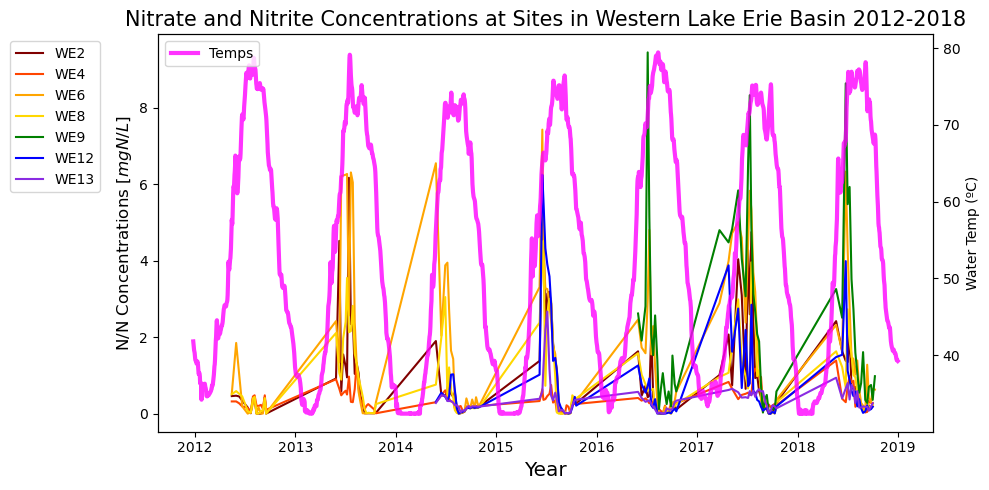

In [14]:
fig, (ax1) = plt.subplots(1, figsize=(10, 5))
#maybe plot each site color the same as the map?
count = 0
colors = ['maroon', 'orangered', 'orange', 'gold', 'green', 'blue', 'blueviolet', 'magenta']
for name in filenames:
    key = name.split('.')[0]
    color = colors[count]
    count = count + 1
    ax1.plot(nutrient_data[key]['\ufeffDate'], nutrient_data[key]['Nitrate_Nitrite'], label = key, color = color)


ax1.legend(loc='upper left', bbox_to_anchor=(-0.2, 1))
ax1.set_xlabel('Year', fontsize='x-large')
ax1.set_ylabel('N/N Concentrations [$mg N/L$]', fontsize='large')
ax1.set_title('Nitrate and Nitrite Concentrations at Sites in Western Lake Erie Basin 2012-2018', fontsize = 15)

ax2 = ax1.twinx()
ax2.set_ylabel('Water Temp (ºC)')
ax2.plot(temp_dates[360:], water_temps[360:], color = 'fuchsia', label = 'Temps', linewidth= 3, alpha = 0.8)
ax2.legend(loc='upper left')
fig.tight_layout()

Here we can see that there is a clear correlation between increasing temperatures and spikes in nutrient content for all the sites. In order to get a better understanding of this relationship, we will zoom into a smaller window. Particularly, we are going to zoom into 6 months of a non-HAB year, 2016. 

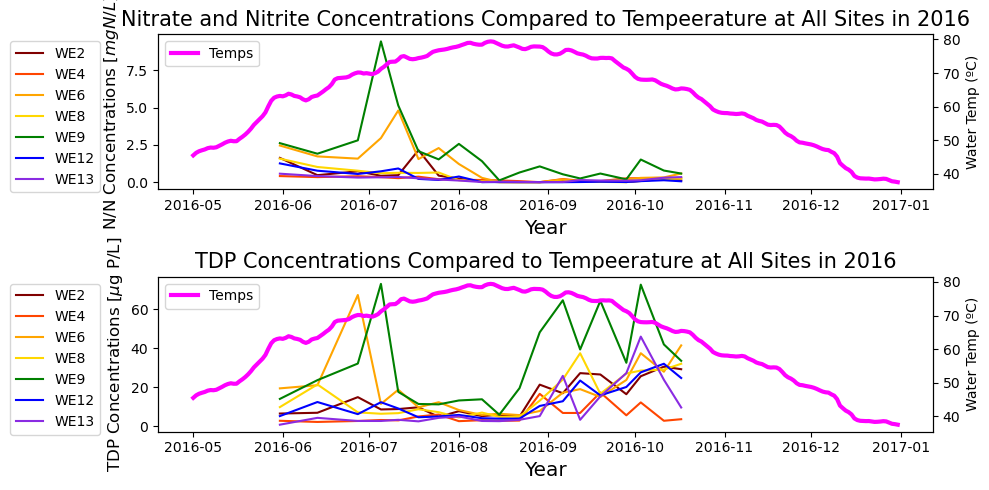

In [15]:
#create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

#array of colors we want our lines plotted as 
colors = ['maroon', 'orangered', 'orange', 'gold', 'green', 'blue', 'blueviolet', 'magenta']
#define a variable to help iterature through the colors array 
count = 0

#same loop as previous code block, but we are limiting to 2016 data 
for name in filenames:
    key = name.split('.')[0]
    color = colors[count]
    count += 1
    
    #FILTERING
    #extract all dates at a specific site
    dates = nutrient_data[key]['\ufeffDate']
    
    #extract all N/N data at a specific site 
    N_concentrations = nutrient_data[key]['Nitrate_Nitrite']
    
    #extract all P data at a specific site 
    P_concentrations = nutrient_data[key]['Total_Dissolved_Phosphorus']
    
    #only get the indices of dates that are within the desired year (2106)
    year_2016_indices = [i for i, date in enumerate(dates) if date.year == 2016]
    
    #use the indices we just found to go back through the date array and include only those dates
    dates_2016 = [dates[i] for i in year_2016_indices]
    
    #only extract nutrient concentrations for the desired year (2016)
    N_concentrations_2016 = [N_concentrations[i] for i in year_2016_indices]
    P_concentrations_2016 = [P_concentrations[i] for i in year_2016_indices]
    
    #plot the sub-data set 
    ax1.plot(dates_2016, N_concentrations_2016 , label=key, color=color)
    ax2.plot(dates_2016, P_concentrations_2016, label=key, color=color)

#add plot elements - legend, title, labels
ax1.legend(loc='upper left', bbox_to_anchor=(-0.2, 1))
ax1.set_xlabel('Year', fontsize='x-large')
ax1.set_ylabel('N/N Concentrations [$mg N/L$]', fontsize='large')
ax1.set_title('Nitrate and Nitrite Concentrations Compared to Tempeerature at All Sites in 2016', fontsize=15)

ax2.legend(loc='upper left', bbox_to_anchor=(-0.2, 1))
ax2.set_xlabel('Year', fontsize='x-large')
ax2.set_ylabel('TDP Concentrations [$\mu$g P/L]', fontsize='large')
ax2.set_title('TDP Concentrations Compared to Tempeerature at All Sites in 2016', fontsize=15)


#extract the dates from the temperature dataset that are within the time period we are interested in 
#(5/1/2016 - 12/31/2016)
temp_dates_2015 = [date for date in temp_dates if dt.datetime(2016, 5, 1) <= date <= dt.datetime(2016, 12, 31)]

#do the same for the actual temperature data
water_temps_2015 = [water_temps[i] for i, date in enumerate(temp_dates) if dt.datetime(2016, 5, 1) <= date
                    <= dt.datetime(2016, 12, 31)]

#create a twin axes for the first subplot
ax3 = ax1.twinx()
#Plot water temperatures for those 2016 dates on first subplot
ax3.plot(temp_dates_2015, water_temps_2015, color='fuchsia', label='Temps', linewidth=3)

#create a twin axes for the second subplot
ax4 = ax2.twinx()

#Plot water temperatures for those 2016 dates on second subplot
ax4.plot(temp_dates_2015, water_temps_2015, color='fuchsia', label='Temps', linewidth=3)

#add labels
ax3.set_ylabel('Water Temp (ºC)')
ax3.legend(loc='upper left')
ax4.set_ylabel('Water Temp (ºC)')
ax4.legend(loc='upper left')

#adjust layout
fig.tight_layout()
plt.show()

From this graph, we can see that the peaks in nitrate/nitrite happen right as temperatures start to rise in the lake which is what we would expect. The same is true for phosphorus, but TDP seems to have a second spike in concentration as temperature is starting to decline in the fall. Based on known earth processes, we might expect the first spike in nutrient to be climate related with the increasing temperatures supporting high nutrient content. The second peak in TDP could be more complexly related to human interaction with nature. Warmer temperatures are usually peak farming periods, so there could be a lag between high temperatures and nutrient runofff from agriculutral land that causes a peak in phosphorus in early fall. Overall, while not the main focus of our analysis, we did want to note the climatic factors such as temperature that can influence nutrient levels in a system. 

----
# PART 2: Correlating Upstream and Downstream Nutrients
Over the given timespan of data, are watershed runoff or wastewater effluent correlated to downstream nutrient concentrations in Lake Erie? Which one has the stronger correlational relationship?

## Question 6
_Create scatterplots showing the relationship between upstream wastewater discharges and downstream Lake Erie nutrients. How do they correlate? Experiment with comparing different nutrient measurements and using different sites. Which comparisons show the strongest relationship? Calculate the Kendall's $\tau$ coefficient for each relationship you examine._

First, we can import and transform the runoff data.

In [16]:
# import runoff data:
# convert first 2 columns to datetime object
tconvert = lambda x: dt.datetime.strptime(str(x), '%Y,  %m,')

# create list of new variable names
varnames = ['datetime', 'flow']

# use genfromtxt to read in data
# set variable names, skip 3 lines for header, extract only relevant columns
# specify column widths & set converter to extract first 2 columns into datetime object!
runoff_data = np.genfromtxt('LakeErie-runoff.csv', names=varnames, delimiter=(9,7), skip_header=3, usecols=(0,1),
                     encoding='utf-8', converters={0:tconvert}, dtype=None)

# data clean-up: delete days where flow value = -999.9
runoff_data = runoff_data[runoff_data['flow'] != -999.9]


# import wastewater discharge data:
# convert first column to datetime object
tconvert = lambda x: dt.datetime.strptime(str(x), '%m/%d/%Y')

# create list of new variable names
varnames = ['datetime', 'final_ammonia', 'secondary_TP', 'secondary_NH3']

# use genfromtxt to read in data
# set converter for the zero-th column to create datetime object, set variable names, skip header
ww_data = np.genfromtxt('GLWA Effluent Nutrients 2012-2018.csv', names=varnames, delimiter=',', skip_header=1,
                     encoding='utf-8', converters={0:tconvert}, dtype=None)

# some 'secondary_TP' measurements are below threshold; set to 0!
ww_data['secondary_TP'][ww_data['secondary_TP'] == "<0.02"] = 0
ww_data['secondary_TP'] = ww_data['secondary_TP'].astype(float)

In order to conduct our bivariate analysis, both datasets need to be the same size and have exactly matching resolutions (i.e., the dates of measurement must be the same). Here, the wastewater data has daily values, whereas the Lake Erie data was taken at very irregular intervals (no more than daily resolution). To plot this data against each other, we must match the dataset size as well as the dates for each respective measurements.

To do this, we wrote a data filtering function that shortens the longer dataset based on datetimes contained in the Lake Erie nutrient dataset. This results in one-to-one matching dates and measurements in both datasets. This is what will enable us to carry out our bivariate analysis.

In [17]:
# filter data! only keep values for which dates match. (i.e., nutrient data and runoff data should be the same length!)

# define a function to filter data down to size
def time_filter(dataset, site):
    '''
    This function filters a dataset by date, keeping ONLY rows with a datetime present in the specified
    nutrient dataset. Returns a filtered data array of the SAME SIZE as the nutrient data for the particular
    site, with MATCHING, ONE-TO-ONE datetimes. This allows for scatter plotting and bivariate analysis between
    both data arrays.
    
    ========
    args:
    data = longer numpy array containing data from extra datetimes; this dataset is to be filtered/cut to size
    site = name of desired nutrient data site; the supplied longer data array will be cut against the data for the site
    
    ========
    example usage:
    data_filtered = timefilter(data, 'WE6')
    
    # resulting data_filtered is now the exact same size as nutrient_data['WE6'], with the exact same 'datetime' values!
    # they can now easily be plotted against one another / compared
    
    '''
    
    # initialize array for boolean index
    index = []
    
    # iterate through datetimes of longer dataset, seeing if datetime matches with nutrient measurement datetime
    # store (True/False) value in boolean array
    for dtime in dataset['datetime']:
        index.append(dtime in nutrient_data[site]['\ufeffDate'])
    
    # index data by resulting boolean array. return!
    return dataset[index]

After filtering the wastewater data according to each nutrient measurement site and plotting against the measurements at each site, we concluded that our initial hypothesis was wrong; there was no visible correlation between the wastewater concentrations and the nutrient measurements at any of the sites. To demonstrate this, a subset of the plots we created is included below. 

These figures are scatterplots comparing the final ammonia concentrations in the wastewater (the only final effluent nutrient measurement we obtained) with the various measurements at site WE4. WE4 is selected because it is closest to the source of discharge, it contains better quality/larger data, and it is representative of our overall results with all the sites. Here, we we use our `timefilter()` function to filter the wastewater discharge data according to datetime. We can then iterate through each nutrient measurement at the selected site, plotting each on a different subplot.

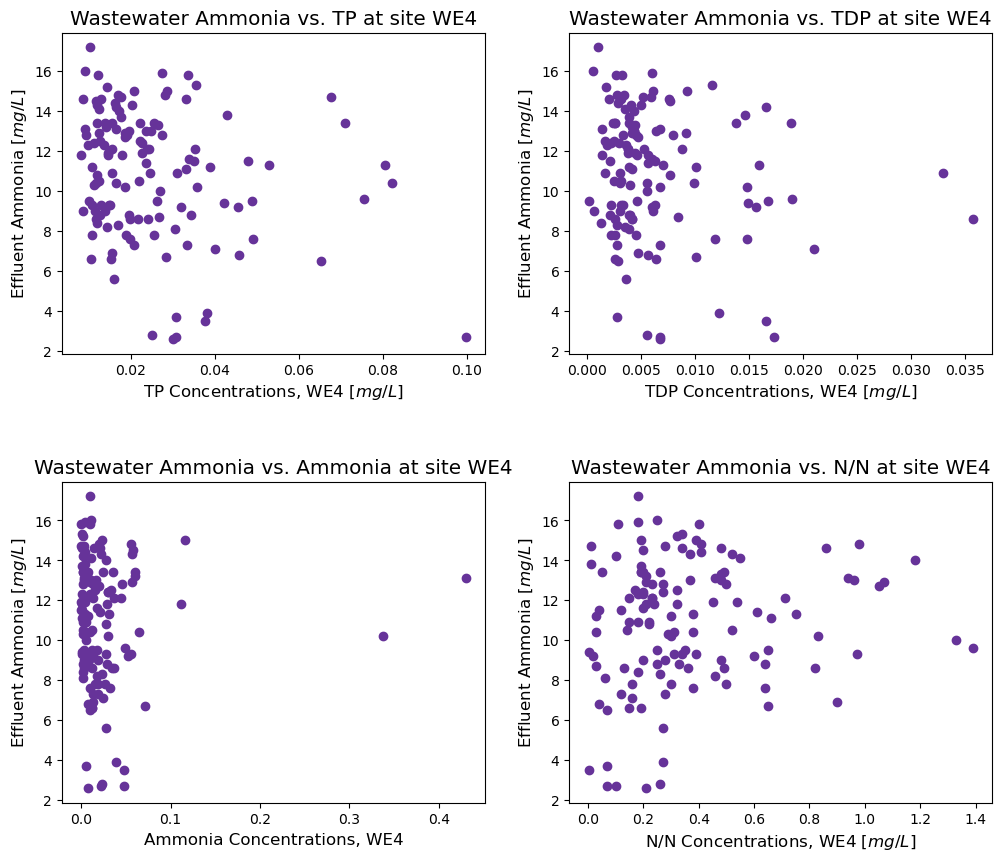

Kendall's τ coefficient:
Wastewater ammonia vs. TotalPhosphorus = -0.1285, p = 0.0317
Wastewater ammonia vs. Total_Dissolved_Phosphorus = -0.0964, p = 0.1072
Wastewater ammonia vs. Ammonia = -0.0849, p = 0.1558
Wastewater ammonia vs. Nitrate_Nitrite = 0.0793, p = 0.1875


In [18]:
# designate site
site = 'WE4'

# filter out wastewater data based on datetimes of given site
ww_data_filtered = time_filter(ww_data, site)

# create figure, axes objects
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))
# adjust vertical spacing
plt.subplots_adjust(hspace=0.4)

# plot/compare a different nutrient on each subplot!
ax1.scatter(nutrient_data[site]['TotalPhosphorus']/1000, ww_data_filtered['final_ammonia'], color='rebeccapurple')
ax1.set_title(f"Wastewater Ammonia vs. TP at site {site}", fontsize='x-large')
ax1.set_xlabel(f"TP Concentrations, {site} [$mg/L$]", fontsize='large')
ax1.set_ylabel("Effluent Ammonia [$mg/L$]", fontsize='large')

ax2.scatter(nutrient_data[site]['Total_Dissolved_Phosphorus']/1000, ww_data_filtered['final_ammonia'], color='rebeccapurple')
ax2.set_title(f"Wastewater Ammonia vs. TDP at site {site}", fontsize='x-large')
ax2.set_xlabel(f"TDP Concentrations, {site} [$mg/L$]", fontsize='large')
ax2.set_ylabel("Effluent Ammonia [$mg/L$]", fontsize='large')

ax3.scatter(nutrient_data[site]['Ammonia']/1000, ww_data_filtered['final_ammonia'], color='rebeccapurple')
ax3.set_title(f"Wastewater Ammonia vs. Ammonia at site {site}", fontsize='x-large')
ax3.set_xlabel(f"Ammonia Concentrations, {site}", fontsize='large')
ax3.set_ylabel("Effluent Ammonia [$mg/L$]", fontsize='large')

ax4.scatter(nutrient_data[site]['Nitrate_Nitrite'], ww_data_filtered['final_ammonia'], color='rebeccapurple')
ax4.set_title(f"Wastewater Ammonia vs. N/N at site {site}", fontsize='x-large')
ax4.set_xlabel(f"N/N Concentrations, {site} [$mg/L$]", fontsize='large')
ax4.set_ylabel("Effluent Ammonia [$mg/L$]", fontsize='large')
plt.show()

# iterate through plots, calculate Kendall's tau for each
print("Kendall's \N{GREEK SMALL LETTER TAU} coefficient:")
for meas in ['TotalPhosphorus', 'Total_Dissolved_Phosphorus', 'Ammonia', 'Nitrate_Nitrite']:
    tau, p_value = kendalltau(nutrient_data[site][meas], ww_data_filtered['final_ammonia'])
    print(f"Wastewater ammonia vs. {meas} = {tau:.4f}, p = {p_value:.4f}")

## Question 7

_Similarly, to compare monthly runoff data to nutrient concentrations, the data arrays need to normalized to be the same lengths and resolutions. Because the runoff data is in cumulative monthly values, we will calculate monthly averages of the nutrient measurements to generate the most accurate comparison for a bivariate analysis. The function below calculates monthly averages of a nutrient dataset, for a given site and variable of interest._

In [19]:
# take monthly averages for nutrient measurements 
def nutrient_mean(site):
    '''
    This function returns an array of MONTHLY AVERAGES for nutrient data, from the original nutrient 
    concentration data at the specified site. Datetimes for monthly averages are set to the first of
    the month.
    '''
    
    avg = [dt.datetime(1, 1, 1), 0, 0, 0, 0]
    for year in range(2012, 2019, 1):
        for month in range(1,13):
            temp = nutrient_data[site][0]
            for i, dtime in enumerate(nutrient_data[site]['\ufeffDate']):
                if (dtime.month == month) & (dtime.year == year):
                    temp = np.vstack((temp, nutrient_data[site][i]))
            if(temp.size > 1):
                temp = temp[1:]       
                month_row = np.array([dt.datetime(year, month, 1), temp['TotalPhosphorus'].mean(), 
                                      temp['Total_Dissolved_Phosphorus'].mean(), temp['Ammonia'].mean(), 
                                      temp['Nitrate_Nitrite'].mean()])
                avg = np.vstack((avg, month_row))

    avg = avg[1:]
    return avg

Once the monthly averages are taken, the datasets are still not the same length, as the Lake Erie nutrient dataset has some months with no measurement values. As a result, the runoff data needs to be shortened to include only months where nutrient data was taken. This is done below, using the same algorithm as the time filtering that was completed in Question 6. All of these steps can then be implemented to generate a scatterplot and find the correlation coefficient of any site specified.

Similarly to as above, a representative collection of subplots for the site WE2 have been included below.

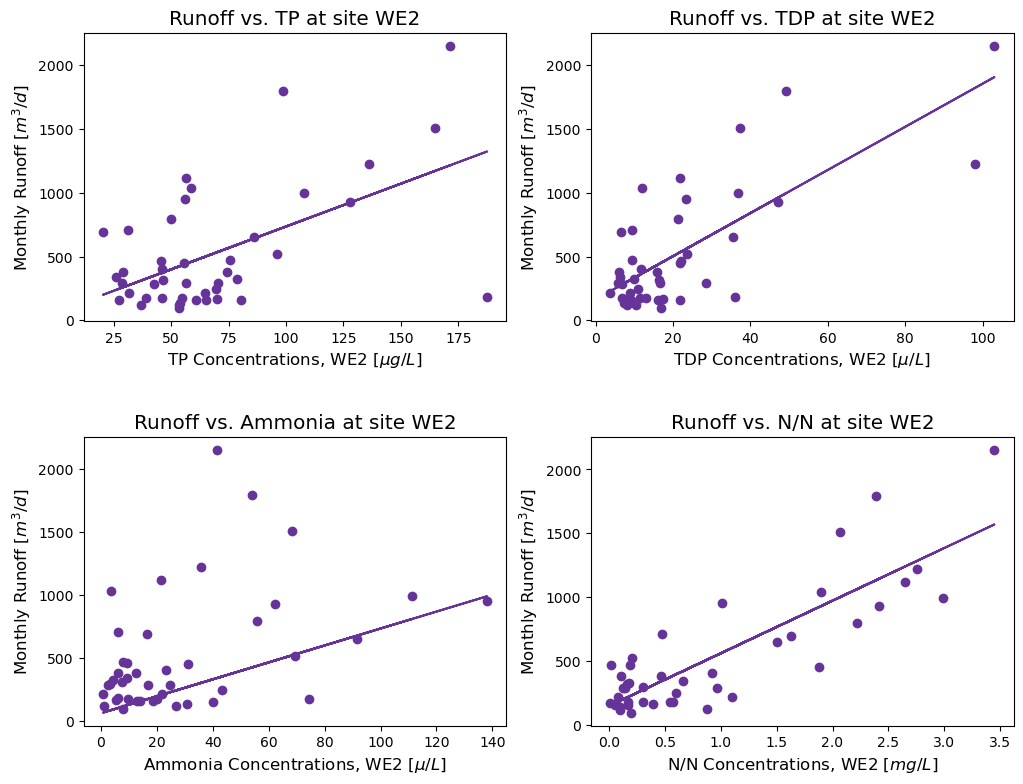

Kendall τ coefficient:
Runoff vs. TotalPhosphorus at WE2 = 0.2558, p = 0.0156
Runoff vs. Total_Dissolved_Phosphorus at WE2 = 0.3533, p = 0.0008
Runoff vs. Ammonia at WE2 = 0.2447, p = 0.0207
Runoff vs. Nitrate_Nitrite at WE2 = 0.5216, p = 0.0000


In [20]:
# for site WE2:
site = 'WE2'

# obtain monthly averages of relevant nutrient data
nutrient_monthly = nutrient_mean(site)

# shorten runoff data to range (use same algorithm as in time_filter() function)
index = []
for dtime in runoff_data['datetime']:
    index.append(dtime in nutrient_monthly[:,0])
runoff_shortened = runoff_data[index]

# plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,9))
plt.subplots_adjust(hspace=0.4)

ax1.scatter(nutrient_monthly[:,1], runoff_shortened['flow'], color="rebeccapurple")
ax1.set_title(f"Runoff vs. TP at site {site}", fontsize='x-large')
ax1.set_xlabel(f"TP Concentrations, {site} [$μg/L$]", fontsize='large')
ax1.set_ylabel("Monthly Runoff [$m^3/d$]", fontsize='large')
# find fit coefficients
coefs1 = np.polyfit(np.array(nutrient_monthly[:,1], dtype=float), runoff_shortened['flow'], 1)
# create a new x-array, obtain polyfit y-values
y1_fit = np.polyval(coefs1, nutrient_monthly[:,1])
ax1.plot(nutrient_monthly[:,1], y1_fit, color='rebeccapurple')

ax2.scatter(nutrient_monthly[:,2], runoff_shortened['flow'], color="rebeccapurple")
ax2.set_title(f"Runoff vs. TDP at site {site}", fontsize='x-large')
ax2.set_xlabel(f"TDP Concentrations, {site} [$μ/L$]", fontsize='large')
ax2.set_ylabel("Monthly Runoff [$m^3/d$]", fontsize='large')
coefs2 = np.polyfit(np.array(nutrient_monthly[:,2], dtype=float), runoff_shortened['flow'], 1)
# create a new x-array, obtain polyfit y-values
y2_fit = np.polyval(coefs2, nutrient_monthly[:,2])
ax2.plot(nutrient_monthly[:,2], y2_fit, color='rebeccapurple')

ax3.scatter(nutrient_monthly[:,3], runoff_shortened['flow'], color="rebeccapurple")
ax3.set_title(f"Runoff vs. Ammonia at site {site}", fontsize='x-large')
ax3.set_xlabel(f"Ammonia Concentrations, {site} [$μ/L$]", fontsize='large')
ax3.set_ylabel("Monthly Runoff [$m^3/d$]", fontsize='large')
coefs3 = np.polyfit(np.array(nutrient_monthly[:,3], dtype=float), runoff_shortened['flow'], 1)
# create a new x-array, obtain polyfit y-values
y3_fit = np.polyval(coefs1, nutrient_monthly[:,3])
ax3.plot(nutrient_monthly[:,3], y3_fit, color='rebeccapurple')

ax4.scatter(nutrient_monthly[:,4], runoff_shortened['flow'], color="rebeccapurple")
ax4.set_title(f"Runoff vs. N/N at site {site}", fontsize='x-large')
ax4.set_xlabel(f"N/N Concentrations, {site} [$mg/L$]", fontsize='large')
ax4.set_ylabel("Monthly Runoff [$m^3/d$]", fontsize='large')
coefs4 = np.polyfit(np.array(nutrient_monthly[:,4], dtype=float), runoff_shortened['flow'], 1)
# create a new x-array, obtain polyfit y-values
y4_fit = np.polyval(coefs4, nutrient_monthly[:,4])
ax4.plot(nutrient_monthly[:,4], y4_fit, color='rebeccapurple')

plt.show()
    
print("Kendall \N{GREEK SMALL LETTER TAU} coefficient:")
for i, meas in enumerate(['TotalPhosphorus', 'Total_Dissolved_Phosphorus', 'Ammonia', 'Nitrate_Nitrite']):
    tau, p_value = kendalltau(nutrient_monthly[:,i+1].astype(float), runoff_shortened['flow'])
    print(f"Runoff vs. {meas} at {site} = {tau:.4f}, p = {p_value:.4f}")

This relationship exhibits much greater correlation than the previous comparison between wastewater and lake nutrients. Based on the Kendall's $\tau$ values, we can see a moderate or even strong correlation between runoff and Lake Erie nutrients at this site. This indicates that runoff may serve as a sufficient proxy for the agricultural nutrient waste running into the lake. It also indicates that at certain sites, agricultural runoff has a pretty direct correlation on nutrient levels within Lake Erie.

## Question 8
_It seems that these are much more strongly correlated than the with the wastewater data! Let's more closely examine this relationship. Take the Kendall's $\tau$ between runoff and Lake Erie nutrients, using each nutrient metric and at each site. Create a heatmap to represent the results._

To display runoff correlation with all measurements at all sites, we can generate a heatmap using the same methods that were used in Part 1. To obtain our matrix of correlation values, we must iterate through all sites and all measurements at each site, finding the correlation coefficients for each. Here, we are finding both the Pearson correlation coefficient and the Kendall's $\tau$ coefficient, and comparing the results for each. The plots below show our results.

In [21]:
# create a matrix with all correlation coef.s and Kendall tau coef.s (including all sites vs. all measured variables)
CC_all = np.zeros((4, 7))
Kendall_all = np.zeros((4, 7))

# iterating through sites
for j, site in enumerate(['WE2', 'WE4', 'WE6', 'WE8', 'WE9', 'WE12', 'WE13']):
    nutrient_monthly = nutrient_mean(site)

    # shorten runoff data to range (use same algorithm as in earlier function)
    index = []
    for dtime in runoff_data['datetime']:
        index.append(dtime in nutrient_monthly[:,0])
    runoff_shortened = runoff_data[index]

    # iterate through each nutrient metric in each site
    for i, meas in enumerate(['TotalPhosphorus', 'Total_Dissolved_Phosphorus', 'Ammonia', 'Nitrate_Nitrite']):
        cc = np.corrcoef([nutrient_monthly[:,i+1].astype(float), runoff_shortened['flow']])
        coef = cc[0,1]
        rho, p = kendalltau(nutrient_monthly[:,i+1].astype(float), runoff_shortened['flow'])
        
        # save in matrix!
        CC_all[i,j] = coef
        Kendall_all[i,j] = rho
        
print(CC_all)
print(Kendall_all)

[[ 0.55171746  0.05101281  0.42698623 -0.06435019  0.71538914  0.42565129
   0.03099001]
 [ 0.74625689  0.38591678  0.80995668  0.67482507  0.77028754  0.70080655
   0.16274738]
 [ 0.43621572  0.33513288  0.61280153  0.53963714  0.34177486  0.35913761
   0.34263741]
 [ 0.84486963  0.41300529  0.76362528  0.74787927  0.67312942  0.83938023
   0.73951505]]
[[ 0.25581395 -0.06341463  0.22702104  0.02325581  0.2         0.10107527
  -0.08965517]
 [ 0.35326689  0.04878049  0.45736434  0.33554817  0.57894737  0.2516129
   0.00689655]
 [ 0.24473976  0.10243902  0.38648948  0.35105205  0.41052632 -0.01075269
   0.00689655]
 [ 0.52159468  0.35265412  0.5503876   0.48837209  0.46315789  0.54251915
   0.48505747]]


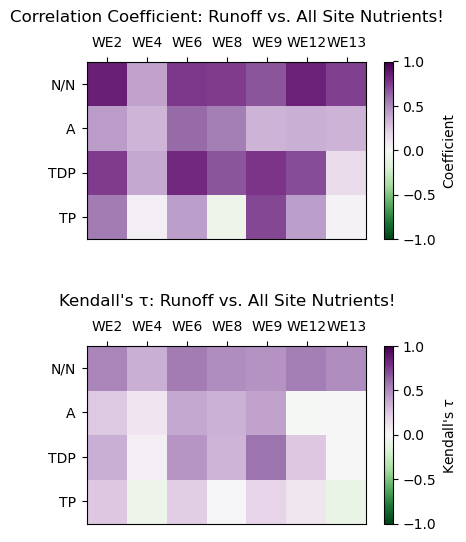

In [22]:
# make the color plot!
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (4.5, 6))
plt.subplots_adjust(hspace=0.6)

# Create the "pcolor" object while plotting it to the axes.
# Use our pcolor object to create a colorbar.
pcol = ax1.pcolor(CC_all, cmap='PRGn_r', vmin=-1., vmax=1.)
cbar = plt.colorbar(pcol, ax=ax1)
cbar.set_label('Coefficient')

# Set some better ticks and tick labels!
xlabels = ['WE2', 'WE4', 'WE6', 'WE8', 'WE9', 'WE12', 'WE13']
ylabels = ['TP', 'TDP', 'A', 'N/N']

# Now, set our ticks and labels. Everything lines up!
ax1.set_xticks(np.arange(0, 7, 1) + .5, xlabels)
ax1.set_yticks(np.arange(0, 4, 1) + .5, ylabels)

# more formatting
ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, pad=5)
ax1.set_title('Correlation Coefficient: Runoff vs. All Site Nutrients!', pad=10)

# Do the same for the Spearman rank coef. matrix:
pcol = ax2.pcolor(Kendall_all, cmap='PRGn_r', vmin=-1., vmax=1.)
cbar = plt.colorbar(pcol, ax=ax2)
cbar.set_label(r"Kendall's $\tau$")

# Set some better ticks and tick labels!
xlabels = ['WE2', 'WE4', 'WE6', 'WE8', 'WE9', 'WE12', 'WE13']
ylabels = ['TP', 'TDP', 'A', 'N/N']

# Now, set our ticks and labels. Everything lines up!
ax2.set_xticks(np.arange(0, 7, 1) + .5, xlabels)
ax2.set_yticks(np.arange(0, 4, 1) + .5, ylabels)

# more formatting
ax2.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, pad=5)
ax2.set_title("Kendall's \N{GREEK SMALL LETTER TAU}: Runoff vs. All Site Nutrients!", pad=10)

plt.show()

From our two colorplots, we can see that the correlation between runoff and lake nutrient levels is moderate to strong at many sites! There are several conclusions we can draw from these plots. First of all, looking at both plots, we can see that N/N and TDP levels were most strongly correlated with runoff. This is consistent with our earlier findings in Part 1, which showed that nitrogen and TDP are most important nutrient metrics to consider in predicting HABs events.

Furthermore, looking at the differences between sites, sites WE2, WE6, and WE9 seem to have the strongest overall correlation with runoff. Referencing the site map, these 3 sites are actually the closest to land, existing in the lake's littoral zone. From this, we can conclude a spatial causation in addition to the correlation values we found - as the agricultural pollution runs off into the lake, it still exists at high nutrient concentrations at those measurement points. It then diffuses through the lake, reaching lower concentrations toward the limnetic zone. This validates our use of runoff as a proxy for nutrient runoff, as well as our hypothesis that land application of fertilizer and other nutrients directly impacts nutrient levels in the lake.

Finally, we can compare our Pearson results to our Kendall's $\tau$ results. Here, our results using the Pearson method yield stronger correlation coefficient values. However, because the Kendall's $\tau$ method is more _robust_ and _resilient_, this matrix shows more reliable values given real world data. This comparison of methods shows that it may be easy for the Pearson's coefficient to yield false positives, or showing stronger relationships than may actually exist. As a result, in any rigorous analysis, using the Kendall's $\tau$ or Spearman rank method will yield more accurate, trustworthy results.

# Conclusions

Throughout the analysis of mutlitudes of data for western Lake Erie between 2012-2018, we have seen that nutrient levels of nitrate/nitrite and dissolved phosphorus vary seasonally. More specifically, nutrients tend to increase in the Summer months (during high temperatures).

Futhermore, nutrient concentrations were seen to have strong positive relationships during significant HAB years, and vice versa (negatively correlated) for mild HAB years. One interesting observation of the peaking nutrient data suggest that even when nutrient levels are particularly high, they tend to synchronously peak during significant HAB years whereas nutrient peaks occur asynchronously during mild HAB years. 

Spacially, sites that were in the lake's Littoral Zone (close to land) have strong correlations of nutrient concentrations from 2012-2018 versus sites in the Limnetic Zones (away from land). This likely represents how much more mixing and dispersal of nutrient concentrations as water travels to Limnetic Zones.
This gave us a strong indication that HABs events were in part caused by additional nutrient loading into Lake Erie so, we went on to investigate this further.
    
Out of wastewater discharge and runoff, we found that our wastewater data had a weak correlation with Lake Erie nutrient levels, but runoff had a much stronger correlation. This may indicate that out of the 2 sources of human pollution, agricultural pollution plays a larger role in HABs events.
This correlation was the strongest in the lake's Littoral Zones, validating our reasoning that runoff from the land carries nutrients into the lake and contributes to lake nutrient levels.

# References

<strong>[1]</strong> Environmental Protection Agency. (2016, August 31). Great Lakes Water Quality Agreement Nutrient Annex 4 Objectives and Targets Development Task Team Multi-Modeling Report - Final. Environmental Protection Agency. https://www.epa.gov/sites/default/files/2016-11/documents/nutrientannex4multimodelingreportfinalappendicessep2016.pdf
    
 <strong>[2]</strong> Lake Erie Watershed, (n.d.) Ohio Coastal Atlas, (3rd ed.). Ohio Department of Natural Resources, https://ohiodnr.gov/static/documents/coastal/ohio-coastal-atlas/CH02_LakeErieWatershed.pdf

<strong>[3]</strong>Marcy et al. “Indicators: Dissolved Oxygen.” Environmental Protection Agency, 8 Sept. 2023, www.epa.gov/national-aquatic-resource-surveys/indicators-dissolved-oxygen.
    
<strong>[4]</strong> Myers, D.N., Thomas, M.A., Frey, J.W., Rheaume, S.J., and Button, D.T. (2000). Water Quality in the Lake Erie-Lake Saint Clair Drainages Michigan, Ohio, Indiana, New York, and Pennsylvania, 1996–98. U.S. Geological Survey Circular 1203, 35. https://pubs.water.usgs.gov/circ1203/

<strong>[5]</strong> National Centers for Coastal Ocean Science. (2011, June 25). Congressional Interest in Harmful Algae and Dead Zone Bill Prompts Hearing. National Centers for Coastal Ocean Science. https://coastalscience.noaa.gov/news/cscor-provides-testimony-to-congress-in-support-of-harmful-algae-and-hypoxia-law/

<strong>[6]</strong> National Centers for Coastal Ocean Science. (2019, November 1). Lake Erie HAB 2019 retrospective: Bloom severity was 7.3, as predicted by seasonal forecast. National Centers for Coastal Ocean Science. https://coastalscience.noaa.gov/news/lake-erie-hab-2019-retrospective-bloom-severity-was-7-3-as-predicted-by-the-seasonal-forecast/

<strong>[7]</strong> Nicholls, K. H., D. W. Standen, G. J. Hopkins, and E. C. Carney, 1977: Declines in the Near-Shore Phytoplankton of Lake Erie’s Western Basin Since 1971. Journal of Great Lakes Research, 3, 72-78.